In [ ]:
# Install language detection and NLP tools
!pip install langdetect
!pip install nltk==<version_used_in_pickle>

# Install machine learning and deep learning libraries
!pip install scikit-learn
!pip install transformers torch datasets

# Install topic modeling and specialized libraries
!pip install bertopic

# Upgrade essential Python tools
!pip install --upgrade pip
!pip install --upgrade wheel


In [ ]:
import os
import pickle
import types
import warnings

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP and language processing
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

# WordCloud
from wordcloud import WordCloud, STOPWORDS

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ParameterGrid
from sklearn.metrics import (
    silhouette_score,
    classification_report,
    accuracy_score,
    mean_squared_error,
    r2_score,
    make_scorer,
)
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.base import BaseEstimator, ClassifierMixin

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Specialized models
from xgboost import XGBClassifier, XGBRegressor
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Text processing and topic modeling
import gensim
from gensim import corpora

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# General utilities
from collections import Counter


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/New_Data/train_about_data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/New_Data/test_about_data.csv")

In [ ]:
train_feature_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/New_Data/train_feature_about_data.csv")

In [ ]:
personality_test_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/Personality/Personality_test_about_data.csv")

In [ ]:
personality_train_data = pd.read_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/Personality/Personality_train_about_data.csv")

In [ ]:
#personality_train_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_train_about_feature_data.csv")

In [ ]:
#personality_train_model_data = pd.read_csv("/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/Personality/Personality_train_about_model_data.csv")

In [ ]:
train_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

username
Success_after_5_years          
-1                          757
 0                        10660
 1                          524

In [ ]:
test_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

username
Success_after_5_years          
-1                          349
 0                         4532
 1                          223

In [ ]:
train_feature_data[["username", "Success_after_5_years"]].groupby("Success_after_5_years").count()

username
Success_after_5_years          
-1                          404
 0                         5330
 1                          245

### Variables Saver

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
"""import pickle

# Path to the saved pickle file
save_file = '/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl'

# Load the variables from the pickle file
with open(save_file, 'rb') as f:
    loaded_variables = pickle.load(f)

# Restore the variables to the global scope
globals().update(loaded_variables)

print("Variables restored successfully!")"""


'import pickle\n\n# Path to the saved pickle file\nsave_file = \'/content/drive/MyDrive/Ordnung/Nova/Cources/3. Semester/Master Thesis/Data_text_variables/all_variables.pkl\'\n\n# Load the variables from the pickle file\nwith open(save_file, \'rb\') as f:\n    loaded_variables = pickle.load(f)\n\n# Restore the variables to the global scope\nglobals().update(loaded_variables)\n\nprint("Variables restored successfully!")'

In [ ]:
personality_test_data = personality_test_data[['username', 'about', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]
personality_train_data = personality_train_data[['username', 'about', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]
"""personality_train_model_data = personality_train_model_data[['username', 'about', 'agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']]"""

"personality_train_model_data = personality_train_model_data[['username', 'about', 'agreeableness', 'openness',\n       'conscientiousness', 'extraversion', 'neuroticism']]"

In [ ]:
test_data

Unnamed: 0                   username  \
0          17116  joseph-chen-cmrp-691bb510   
1          21025               dylan-lawhon   
2           3115                   victor-i   
3          14919               davidstavens   
4          15700       melissajamesmorrison   
...          ...                        ...   
5099        6056                traciebrack   
5100        2928      adam-norris-09528b149   
5101       14359                 ryandenehy   
5102       11286   vasil-karpitski-29142619   
5103       19323          nicholasshevelyov   

                                                  about  \
0     Joseph has 18 years of experience working on t...   
1     I am currently working as an Independent Secur...   
2     With over 9 years of experience in fintech, bl...   
3     I build world class technology that improves h...   
4     Melissa James BA LLB (Hons) GAICD is a Partner...   
...                                                 ...   
5099  I have the privilege of working with global in...   
5100  Building the worlds best electric scooter bran...   
5101  3x entrepreneur with two exits to public compa...   
5102  - Business Development Management and Sales ma...   
5103  vCSO.ai provides cyber security executive advi...   

      Success_after_5_years equity_rounds_raised_after_5_years  \
0                         0                                  0   
1                         0                                  2   
2                         0                                  0   
3                         1                                  3   
4                        -1                                  —   
...                     ...                                ...   
5099                      0                                  1   
5100                      0                                  1   
5101                      1                                  2   
5102                      0                                  1   
5103                      0                                  1   

      Success_until_now  
0                     0  
1                     0  
2                     0  
3                     1  
4                    -1  
...                 ...  
5099                  0  
5100                  0  
5101                  1  
5102                  0  
5103                  1  

[5104 rows x 6 columns]

In [ ]:
train_feature_data

Unnamed: 0                               username  \
0           5499                    jerry-nihen-18640a2   
1          16801                             eamendez01   
2          11291  %E2%9A%A1%EF%B8%8Falex-harris-7652069   
3           1036                              nitinrai1   
4           8130                    businesscybershield   
...          ...                                    ...   
5974       18634                  melika-imoru-38259330   
5975       21032                     jordan-m-b89b65253   
5976       13185                          philippemnoel   
5977        9013                              dixondoll   
5978       18740                 nidhi-sachdeva-toronto   

                                                  about  \
0     With a robust foundation in pre-sales engineer...   
1     Skilled in mergers and acquisitions, restructu...   
2     #1 Developer Tool of the Week on Product Hunt\...   
3     Entrepreneur, CEO, Executive, Angel Investor a...   
4     As the Founder and CEO / CTO of Business Cyber...   
...                                                 ...   
5974  A dynamic and passionate, result driven produc...   
5975  Some stuff about me; looking for the carry so ...   
5976  ParadeDB: https://github.com/paradedb/paradedb...   
5977  For more than 35 years, Dixon has influenced a...   
5978  As an experienced educator, an evidence-inform...   

      Success_after_5_years equity_rounds_raised_after_5_years  \
0                         0                                  1   
1                         0                                  0   
2                         0                                  1   
3                         0                                  1   
4                         0                                  1   
...                     ...                                ...   
5974                      0                                  0   
5975                      0                                  2   
5976                     -1                                  4   
5977                      0                                  1   
5978                      0                                  0   

      Success_until_now  
0                     1  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
5974                  0  
5975                  0  
5976                 -1  
5977                  1  
5978                  0  

[5979 rows x 6 columns]

In [ ]:
about_df = pd.concat([train_data, test_data], ignore_index=True)
about_df

Unnamed: 0                  username  \
0            6356              josh-rickard   
1            9317         farshad-kazemian-   
2           19690      kannanmuthukkaruppan   
3           21602     puja-wadhawan-02880a3   
4           14084                    kadiru   
...           ...                       ...   
17040        6056               traciebrack   
17041        2928     adam-norris-09528b149   
17042       14359                ryandenehy   
17043       11286  vasil-karpitski-29142619   
17044       19323         nicholasshevelyov   

                                                   about  \
0      I am a creator of things, who loves to automat...   
1      .................. WHAT IF EATING MEAT COULD H...   
2      I have primarily worked on databases, large sc...   
3      Dynamic, resourceful and ethical Executive Ass...   
4      As of Sep 2024, slowly coming out of a long te...   
...                                                  ...   
17040  I have the privilege of working with global in...   
17041  Building the worlds best electric scooter bran...   
17042  3x entrepreneur with two exits to public compa...   
17043  - Business Development Management and Sales ma...   
17044  vCSO.ai provides cyber security executive advi...   

       Success_after_5_years equity_rounds_raised_after_5_years  \
0                          0                                  0   
1                          0                                  1   
2                          0                                  2   
3                          0                                  1   
4                          0                                  2   
...                      ...                                ...   
17040                      0                                  1   
17041                      0                                  1   
17042                      1                                  2   
17043                      0                                  1   
17044                      0                                  1   

       Success_until_now  
0                      0  
1                      0  
2                      0  
3                      0  
4                     -1  
...                  ...  
17040                  0  
17041                  0  
17042                  1  
17043                  0  
17044                  1  

[17045 rows x 6 columns]

In [ ]:
# Test language detection on a sample
sample_text = about_df['about'].iloc[1]
print(detect(sample_text))  # See if this outputs 'en' for English
sample_text

en


".................. WHAT IF EATING MEAT COULD HAVE A POSITIVE IMPACT ON THE ENVIRONMENT?................... \nLet’s talk about Carbon-Neutral Beef \n\nThe conventional meat industry is under criticism for practices that are unsustainable and unethical. This is a £31billion industry that needs to be challenged, reinvented and radically improved.\n\nThe Ethical Butcher is fundamentally disrupting the meat industry. It's possible to raise animals in a way that is carbon negative and increases biodiversity, repairing land damaged by traditional agriculture and combating climate change.,\n\nWe are live on Crowdcube, one of Europe’s leading crowdfunding platforms. To join the craft beef revolution and help to change the future of the meat industry towards an ethical direction which is good for us, the environment and the future visit www.crowdcube.com/theethicalbutcher\n\nFarshad is a Carbon-Negative meat visionary & Craft Beef revolutionist. Crowdfunding for a sustainable ethical business t

In [ ]:
# Ensure consistent language detection
DetectorFactory.seed = 42

# Define the function to filter rows with English text
def filter_english_rows(df, column_name):
    # Check if the DataFrame is empty
    if df.empty:
        return df  # Return the empty DataFrame if it's empty

    def is_english(text):
        try:
            return detect(text) == 'en'  # Detect if the text is English
        except Exception:
            return False  # If detection fails, treat as non-English

    # Apply the language detection function to the specified column
    df['is_english'] = df[column_name].apply(lambda x: is_english(x) if pd.notnull(x) else False)
    df_filtered = df[df['is_english']==True]  # Keep only rows with English text
    df_filtered = df_filtered.drop(columns=['is_english'])  # Remove the helper column
    return df_filtered

# Filter rows where 'about' is in English
train_data = filter_english_rows(train_data, 'about')
test_data = filter_english_rows(test_data, 'about')
train_feature_data = filter_english_rows(train_feature_data, 'about')
personality_train_data = filter_english_rows(personality_train_data, 'about')
personality_test_data = filter_english_rows(personality_test_data, 'about')
#personality_train_model_data = filter_english_rows(personality_train_model_data, 'about')

about_df = pd.concat([train_data, test_data], ignore_index=True)
about_df

<ipython-input-23-e069b7046a8e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_english'] = df[column_name].apply(lambda x: is_english(x) if pd.notnull(x) else False)
<ipython-input-23-e069b7046a8e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_english'] = df[column_name].apply(lambda x: is_english(x) if pd.notnull(x) else False)


Unnamed: 0                  username  \
0            6356              josh-rickard   
1            9317         farshad-kazemian-   
2           19690      kannanmuthukkaruppan   
3           21602     puja-wadhawan-02880a3   
4           14084                    kadiru   
...           ...                       ...   
16720        6056               traciebrack   
16721        2928     adam-norris-09528b149   
16722       14359                ryandenehy   
16723       11286  vasil-karpitski-29142619   
16724       19323         nicholasshevelyov   

                                                   about  \
0      I am a creator of things, who loves to automat...   
1      .................. WHAT IF EATING MEAT COULD H...   
2      I have primarily worked on databases, large sc...   
3      Dynamic, resourceful and ethical Executive Ass...   
4      As of Sep 2024, slowly coming out of a long te...   
...                                                  ...   
16720  I have the privilege of working with global in...   
16721  Building the worlds best electric scooter bran...   
16722  3x entrepreneur with two exits to public compa...   
16723  - Business Development Management and Sales ma...   
16724  vCSO.ai provides cyber security executive advi...   

       Success_after_5_years equity_rounds_raised_after_5_years  \
0                          0                                  0   
1                          0                                  1   
2                          0                                  2   
3                          0                                  1   
4                          0                                  2   
...                      ...                                ...   
16720                      0                                  1   
16721                      0                                  1   
16722                      1                                  2   
16723                      0                                  1   
16724                      0                                  1   

       Success_until_now  
0                      0  
1                      0  
2                      0  
3                      0  
4                     -1  
...                  ...  
16720                  0  
16721                  0  
16722                  1  
16723                  0  
16724                  1  

[16725 rows x 6 columns]

1. EDA for the Text Column

Total rows: 16725
Missing values: 0
Duplicate entries: 842
Unique entries: 15883


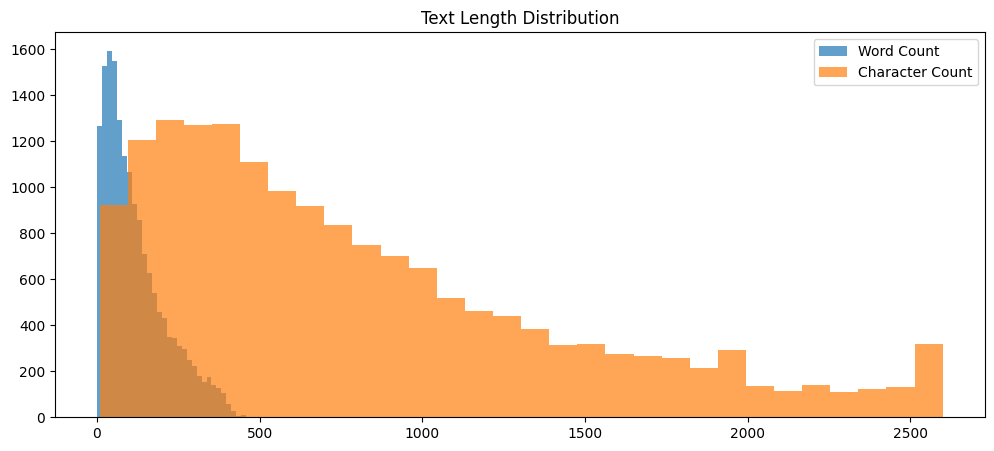

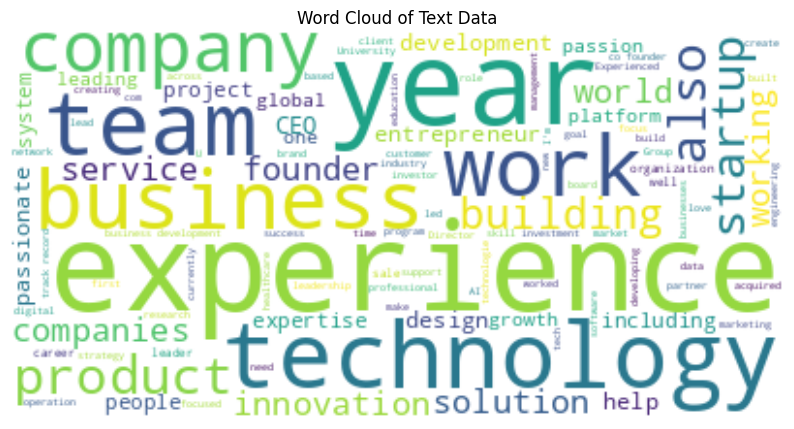

In [ ]:
# EDA: Analyze the text column
def eda_text_column(df, column_name):
    print(f"Total rows: {len(df)}")
    print(f"Missing values: {df[column_name].isnull().sum()}")
    print(f"Duplicate entries: {df[column_name].duplicated().sum()}")
    print(f"Unique entries: {df[column_name].nunique()}")

    # Text length distributions
    df['text_length'] = df[column_name].str.len()
    df['word_count'] = df[column_name].str.split().apply(len)

    # Plot length distributions
    plt.figure(figsize=(12, 5))
    plt.hist(df['word_count'].dropna(), bins=30, alpha=0.7, label='Word Count')
    plt.hist(df['text_length'].dropna(), bins=30, alpha=0.7, label='Character Count')
    plt.title('Text Length Distribution')
    plt.legend()
    plt.show()

    # Generate Word Cloud
    all_text = " ".join(df[column_name].dropna())
    wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(all_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Text Data")
    plt.show()

eda_text_column(about_df, 'about')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total rows: 16725
Missing values: 0
Duplicate entries: 842
Unique entries: 15883


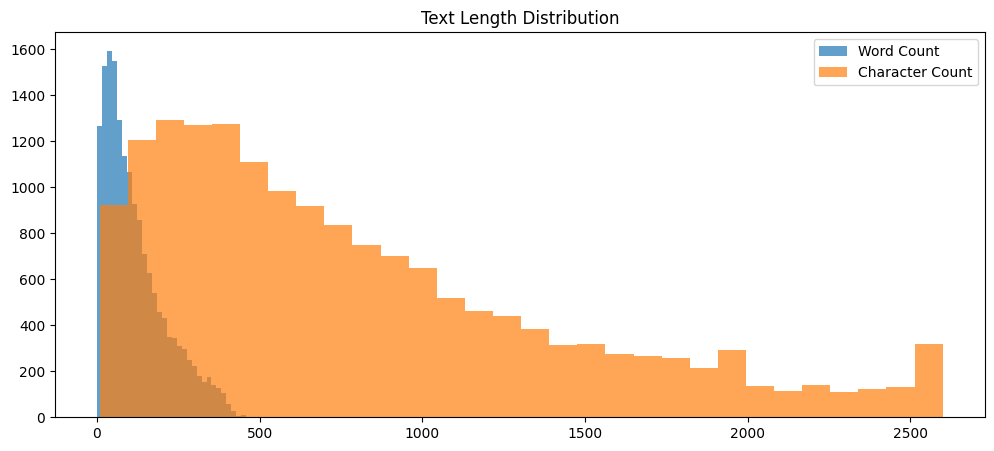

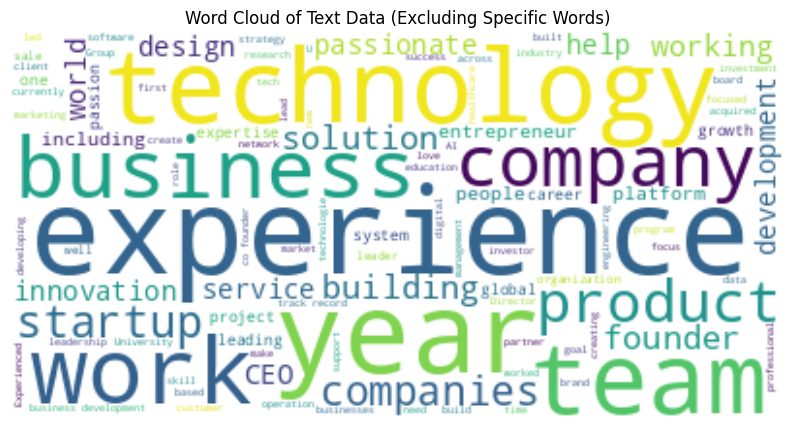

In [ ]:
# EDA: Analyze the text column
# Download stopwords if not already downloaded
nltk.download('stopwords')

def eda_text_column(df, column_name):
    print(f"Total rows: {len(df)}")
    print(f"Missing values: {df[column_name].isnull().sum()}")
    print(f"Duplicate entries: {df[column_name].duplicated().sum()}")
    print(f"Unique entries: {df[column_name].nunique()}")

    # Text length distributions
    df['text_length'] = df[column_name].str.len()
    df['word_count'] = df[column_name].str.split().apply(len)

    # Plot length distributions
    plt.figure(figsize=(12, 5))
    plt.hist(df['word_count'].dropna(), bins=30, alpha=0.7, label='Word Count')
    plt.hist(df['text_length'].dropna(), bins=30, alpha=0.7, label='Character Count')
    plt.title('Text Length Distribution')
    plt.legend()
    plt.show()

    # Generate Word Cloud
    excluded_words = {"hashtag", "comment", "like", "repost", "send", "followers"}
    custom_stopwords = set(stopwords.words('english')) | STOPWORDS | excluded_words

    # Concatenate all text for the word cloud
    all_text = " ".join(df[column_name].dropna())

    # Generate the word cloud with the additional excluded words
    wordcloud = WordCloud(
        stopwords=custom_stopwords,
        background_color='white'
    ).generate(all_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Text Data (Excluding Specific Words)")
    plt.show()

# Assuming `about_df` is your DataFrame
eda_text_column(about_df, 'about')


2. Preprocessing for Clustering Steps:
- Tokenization and text cleaning (e.g., removing stopwords, punctuation).
- Vectorization for clustering (e.g., TF-IDF or word embeddings).

In [ ]:
def train_test_split_data(data, test_size=0.3, random_state=42):
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)

    # Verify the result
    print(f"Number of rows in training data: {len(train_data)}")
    print(f"Number of rows in test data: {len(test_data)}")

    return train_data, test_data

Preprocessing: Tokenization and Text Cleaning

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(df, column_name):
    stop_words = set(stopwords.words('english'))

    # Tokenization and Cleaning
    df['cleaned_text'] = df[column_name].dropna().apply(
        lambda x: " ".join([word for word in word_tokenize(x.lower())
                            if word.isalpha() and word not in stop_words])
    )
    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vectorization for Clustering: TF-IDF

In [ ]:
def vectorize_text(df, column_name):
    vectorizer = TfidfVectorizer(max_features=1000)  # Adjust features as needed
    X = vectorizer.fit_transform(df[column_name].dropna())
    return X, vectorizer


In [ ]:
#train_data, test_data = train_test_split_data(data, test_size=0.3, random_state=42)

In [ ]:
train_feature_data = preprocess_text(train_feature_data, 'about')

In [ ]:
train_data = preprocess_text(train_data, 'about')

In [ ]:
test_data = preprocess_text(test_data, 'about')


In [ ]:
personality_train_data = preprocess_text(personality_train_data, 'about')
personality_test_data = preprocess_text(personality_test_data, 'about')
#personality_train_model_data = preprocess_text(personality_train_model_data, 'about')

In [ ]:
test_data

Unnamed: 0                   username  \
0          17116  joseph-chen-cmrp-691bb510   
1          21025               dylan-lawhon   
2           3115                   victor-i   
3          14919               davidstavens   
4          15700       melissajamesmorrison   
...          ...                        ...   
5099        6056                traciebrack   
5100        2928      adam-norris-09528b149   
5101       14359                 ryandenehy   
5102       11286   vasil-karpitski-29142619   
5103       19323          nicholasshevelyov   

                                                  about  \
0     Joseph has 18 years of experience working on t...   
1     I am currently working as an Independent Secur...   
2     With over 9 years of experience in fintech, bl...   
3     I build world class technology that improves h...   
4     Melissa James BA LLB (Hons) GAICD is a Partner...   
...                                                 ...   
5099  I have the privilege of working with global in...   
5100  Building the worlds best electric scooter bran...   
5101  3x entrepreneur with two exits to public compa...   
5102  - Business Development Management and Sales ma...   
5103  vCSO.ai provides cyber security executive advi...   

      Success_after_5_years equity_rounds_raised_after_5_years  \
0                         0                                  0   
1                         0                                  2   
2                         0                                  0   
3                         1                                  3   
4                        -1                                  —   
...                     ...                                ...   
5099                      0                                  1   
5100                      0                                  1   
5101                      1                                  2   
5102                      0                                  1   
5103                      0                                  1   

      Success_until_now                                       cleaned_text  
0                     0  joseph years experience working client side ag...  
1                     0  currently working independent security researc...  
2                     0  years experience fintech blockchain cloud doma...  
3                     1  build world class technology improves human li...  
4                    -1  melissa james ba llb hons gaicd partner touris...  
...                 ...                                                ...  
5099                  0  privilege working global industry leaders tran...  
5100                  0  building worlds best electric scooter brand of...  
5101                  1  entrepreneur two exits public companies invest...  
5102                  0  business development management sales manageme...  
5103                  1  provides cyber security executive advisory ser...  

[4991 rows x 7 columns]

For the vectorization we have to train the vectorization on the train data and apply it to the test data

In [ ]:
train_feature_data = train_feature_data[train_feature_data['cleaned_text'].notna()]

In [ ]:
train_data = train_data[train_data['cleaned_text'].notna()]
X_train, vectorizer = vectorize_text(train_data, 'cleaned_text')


In [ ]:
X_test = vectorizer.transform(test_data['cleaned_text'].dropna())

In [ ]:
test_data = test_data[test_data['cleaned_text'].notna()]


In [ ]:
X_test

<4991x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 189263 stored elements in Compressed Sparse Row format>

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


3. Clustering Approaches:
- K-means with vectorized data.
- Hierarchical clustering.
- Topic modeling with Latent Dirichlet Allocation (LDA).

Split data in train and test split. Usually in supervised learing a train test split is uncommon, but in this case it is important, because we want to make sure that the clusters are applicable to previously unseen data

Step 3: Clustering with K-Means

In [ ]:
def cluster_text(X_train, X_test, n_clusters=5):
    # Step 2: Train the KMeans model on the training dataset
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)  # Train the model on the training data

    # Step 3: Predict the clusters on the test dataset
    train_clusters = kmeans.predict(X_train)  # Predict on the training data
    test_clusters = kmeans.predict(X_test)  # Predict on the test data

    # Step 4: Evaluate clustering on the test dataset using Silhouette Score
    score = silhouette_score(X_test, test_clusters)
    print(f"Silhouette Score on test data for {n_clusters} clusters: {score}")

    # Step 5: Return both the test clusters and the trained KMeans model
    return test_clusters, train_clusters, kmeans  # Ensure you return these values


Step 3.1: Visualize Clusters

In [ ]:
def visualize_clusters(X, clusters):
    # Convert sparse matrix to dense if necessary
    if hasattr(X, "toarray"):
        X = X.toarray()

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X)

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title("PCA Visualization of Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster")
    plt.show()


Step 4: Assign Topics to Clusters

In [ ]:
def assign_topic_labels(df, clusters, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    df['about_cluster_Kmeans_initial_model'] = clusters

    # Get top words for each cluster
    topic_labels = {}
    for cluster in set(clusters):
        # Combine all text in the cluster
        cluster_texts = " ".join(df[df['about_cluster_Kmeans_initial_model'] == cluster]['cleaned_text'])
        # Count term frequencies
        cluster_vector = Counter(word_tokenize(cluster_texts))
        top_words = cluster_vector.most_common(n_top_words)
        topic_labels[cluster] = [word for word, _ in top_words]

    # Display topics
    print("Cluster Topics:")
    for cluster, words in topic_labels.items():
        print(f"Cluster {cluster}: {', '.join(words)}")

    return topic_labels


1. Perform Clusting:

Silhouette Score on test data for 5 clusters: 0.008536532677003703


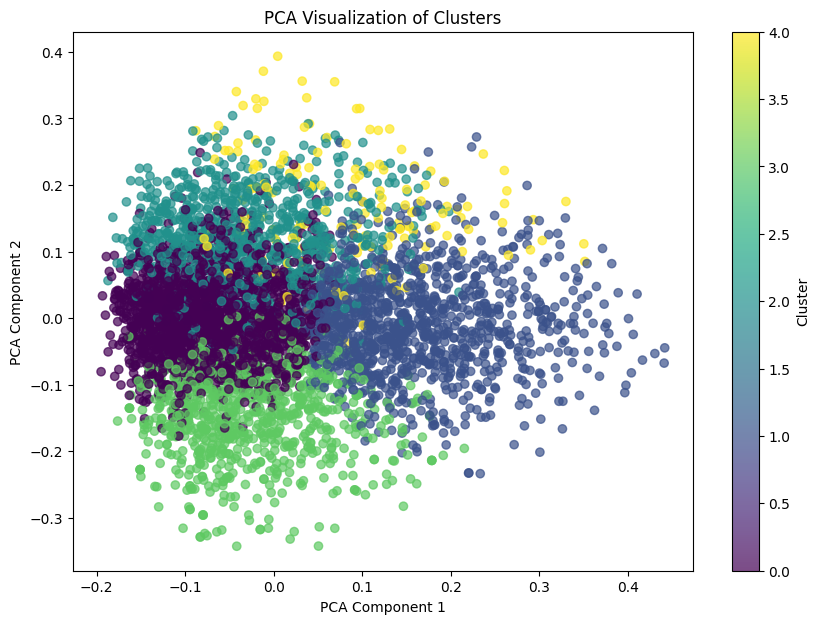

In [ ]:
test_clusters, train_clusters, kmeans_model = cluster_text(X_train, X_test, n_clusters=5)
visualize_clusters(X_test, test_clusters)


2. Assign Topics:

Comparing the labeling of the clusters for test and training data

In [ ]:
topic_labels = assign_topic_labels(test_data, test_clusters, vectorizer)

Cluster Topics:
Cluster 0: experience, business, years, work, technology, people, new, world, also, help
Cluster 1: business, management, marketing, experience, development, product, sales, growth, teams, strategic
Cluster 2: software, data, development, experience, security, engineering, years, systems, technology, management
Cluster 3: companies, business, technology, capital, company, board, venture, experience, years, ceo
Cluster 4: history, working, demonstrated, experienced, skilled, industry, professional, strong, management, business


In [ ]:
topic_labels = assign_topic_labels(train_data, train_clusters, vectorizer)

Cluster Topics:
Cluster 0: experience, business, work, years, people, new, technology, world, company, also
Cluster 1: business, management, marketing, development, experience, product, sales, growth, teams, strategic
Cluster 2: data, software, experience, development, security, engineering, years, management, technology, design
Cluster 3: companies, business, technology, company, capital, board, experience, venture, years, also
Cluster 4: history, demonstrated, experienced, working, skilled, industry, professional, strong, business, management


### Topic Analysis
Cluster 0: General Professional Experience and Impact
Keywords: experience, business, years, work, technology, people, new, world, also, help
Interpretation: This cluster emphasizes broad professional experience and impact, with references to working in diverse areas such as business and technology. The inclusion of "world" and "help" suggests a global perspective and a focus on contributions to others or industries.

Cluster 1: Business Strategy and Marketing
Keywords: business, management, marketing, experience, development, product, sales, growth, teams, strategic
Interpretation: This cluster focuses on business strategy, marketing, and team management. It reflects expertise in driving growth, product development, and strategic planning, with an emphasis on leadership roles in business operations.

Cluster 2: Software and Technical Expertise
Keywords: software, data, development, experience, security, engineering, years, systems, technology, management
Interpretation: This cluster highlights technical expertise in software development, data, and security. It suggests a focus on engineering and system management, with an emphasis on years of experience in the technology domain.

Cluster 3: Leadership and Venture Capital
Keywords: companies, business, technology, capital, company, board, venture, experience, years, ceo
Interpretation: This cluster centers on leadership roles in businesses, particularly in technology and venture capital. Keywords like "board," "venture," and "ceo" suggest discussions around entrepreneurship, executive leadership, and investment.

Cluster 4: Industry-Specific Expertise and Professionalism
Keywords: history, working, demonstrated, experienced, skilled, industry, professional, strong, management, business
Interpretation: This cluster emphasizes professionalism and industry-specific expertise. Words like "demonstrated," "skilled," and "strong" indicate proven capabilities and a solid track record in various sectors.

Summary of Themes

Broad Experience and Contributions: Cluster 0 reflects a global perspective on professional experience and technological impact.
Business and Strategy: Cluster 1 focuses on business growth, marketing, and strategic team management.
Technical Expertise: Cluster 2 emphasizes skills in software development, data, and engineering.
Leadership and Investments: Cluster 3 highlights executive roles, entrepreneurship, and venture capital involvement.
Proven Professionalism: Cluster 4 showcases strong industry-specific expertise and a history of professional success.

Parameters: {'max_iter': 300, 'n_clusters': 2, 'n_init': 15}, Silhouette Score: 0.006221085796782084
Parameters: {'max_iter': 300, 'n_clusters': 3, 'n_init': 15}, Silhouette Score: 0.005957711319927916
Parameters: {'max_iter': 300, 'n_clusters': 4, 'n_init': 15}, Silhouette Score: 0.007479490611480614
Parameters: {'max_iter': 300, 'n_clusters': 5, 'n_init': 15}, Silhouette Score: 0.008807413707338587
Parameters: {'max_iter': 300, 'n_clusters': 6, 'n_init': 15}, Silhouette Score: 0.0103353442201357
Parameters: {'max_iter': 300, 'n_clusters': 7, 'n_init': 15}, Silhouette Score: 0.011155313555317542
Parameters: {'max_iter': 300, 'n_clusters': 8, 'n_init': 15}, Silhouette Score: 0.010943242656701914
Parameters: {'max_iter': 300, 'n_clusters': 9, 'n_init': 15}, Silhouette Score: 0.011585923921883057
Parameters: {'max_iter': 300, 'n_clusters': 10, 'n_init': 15}, Silhouette Score: 0.012451674361036355
Parameters: {'max_iter': 300, 'n_clusters': 11, 'n_init': 15}, Silhouette Score: 0.011980954

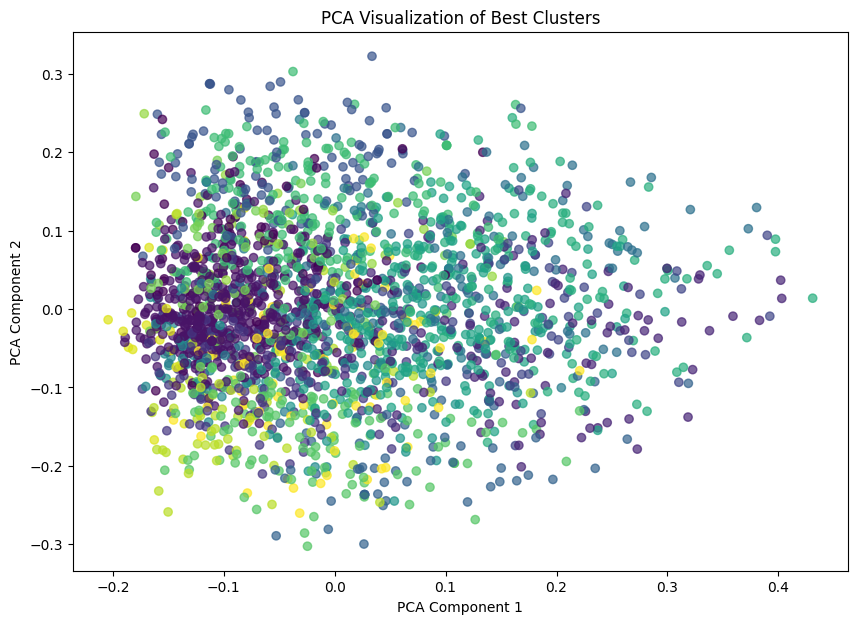

clusters on previously unseen data to prevent overfitting on the test data:
Silhouette Score for Test Clusters: 0.014250211379609058


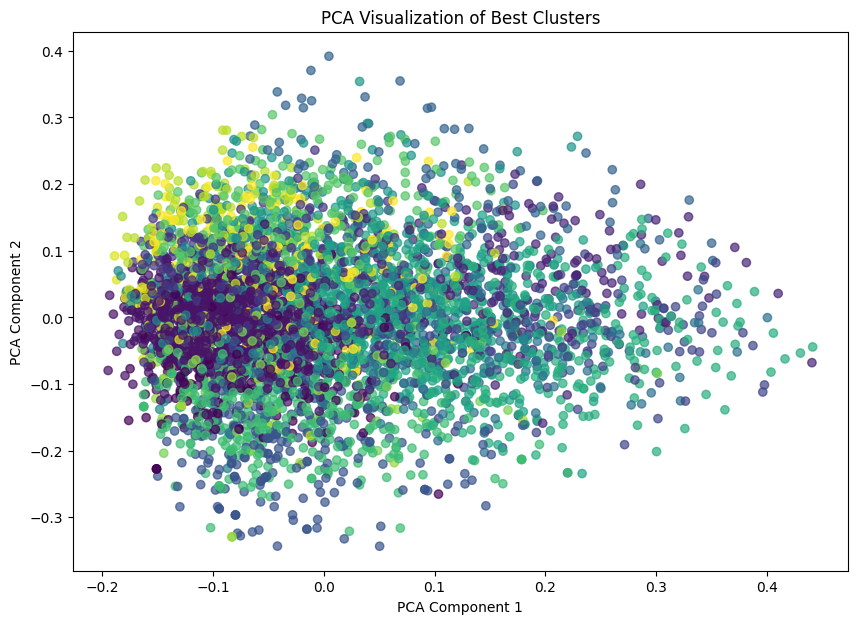

Cluster Topics:
Cluster 0: entrepreneur, investor, business, technology, companies, startup, tech, experience, serial, founder
Cluster 1: people, business, work, world, new, help, experience, years, technology, building
Cluster 2: product, development, products, experience, management, teams, business, technology, building, software
Cluster 3: technology, engineering, research, learning, science, development, university, experience, ai, computer
Cluster 4: sales, business, management, experience, development, marketing, growth, revenue, customer, team
Cluster 5: capital, companies, venture, investment, business, technology, experience, growth, years, investor
Cluster 6: history, demonstrated, experienced, working, skilled, industry, professional, strong, business, management
Cluster 7: marketing, digital, media, business, experience, growth, brand, content, strategy, social
Cluster 8: medical, clinical, development, experience, research, device, health, care, medicine, university
Clust

In [ ]:
# prompt: give me a code to improve the hyperparameters to reach the best possible silhuette score on the respective kvold holdouts
C_train, C_test = train_test_split(X_train, test_size=0.2, random_state=42)  # Adjust test size as needed

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], # Number of Clusters
    'max_iter': [300], # Maximum Iterations
    'n_init': [15]   # Number of initializations
}

best_score = -1
best_params = {}
best_kmeans_model = None

# Iterate through all combinations of parameters
for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params, random_state=42)  # Create a KMeans model with the current parameters
    kmeans.fit(C_train)

    train_clusters = kmeans.predict(C_train)
    c_test_clusters = kmeans.predict(C_test)
    score = silhouette_score(C_test, c_test_clusters)

    print(f"Parameters: {params}, Silhouette Score: {score}")

    if score > best_score:
        best_score = score
        best_params = params
        best_kmeans_model = kmeans

print(f"\nBest Parameters: {best_params}, Best Silhouette Score: {best_score}")

# Visualize best clusters
def visualize_clusters(X, clusters):
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X.toarray())
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title("PCA Visualization of Best Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

visualize_clusters(C_test, best_kmeans_model.predict(C_test))


def assign_topic_labels(df, clusters, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    df['about_grid_optimized_k-means_cluster'] = clusters
    topic_labels = {}
    for cluster in set(clusters):
        cluster_texts = " ".join(df[df['about_grid_optimized_k-means_cluster'] == cluster]['cleaned_text'])
        cluster_vector = Counter(word_tokenize(cluster_texts))
        top_words = cluster_vector.most_common(n_top_words)
        topic_labels[cluster] = [word for word, _ in top_words]
    print("Cluster Topics:")
    for cluster, words in topic_labels.items():
        print(f"Cluster {cluster}: {', '.join(words)}")
    return topic_labels


# Assign topics using the best model
c_train_clusters = best_kmeans_model.predict(C_train)
c_test_clusters = best_kmeans_model.predict(C_test)
test_clusters = best_kmeans_model.predict(X_test)
train_clusters = best_kmeans_model.predict(X_train)

print("clusters on previously unseen data to prevent overfitting on the test data:")
score = silhouette_score(X_test, test_clusters)
print(f"Silhouette Score for Test Clusters: {score}")
# Visualize test clusters
visualize_clusters(X_test, test_clusters)

topic_labels = assign_topic_labels(train_data, train_clusters, vectorizer)
topic_labels = assign_topic_labels(test_data, test_clusters, vectorizer)

## Hierarchical Clustering
### Normalization
KMeans does not use a distance matrix explicitly but rather computes distances dynamically during the clustering process (e.g., using Euclidean distance). However, normalization or standardization is still important for KMeans.

Since hierarchical clustering uses distances, it's essential to normalize or standardize the data (e.g., using MinMaxScaler or StandardScaler).

Unfortunately we can not use hierarchical clustering on this probelm, because it does not allow us to cluster previously unseen data. The goal of our models final model is, that we can also apply it to new data. Features created by hierarchical clustering don't allow this because hierarchical clustering requires a linkage matrix.


Additional Notes
Clustering Methods: Common linkage methods include:

ward: Minimizes the variance within clusters.
single: Uses the minimum distance between points.
complete: Uses the maximum distance between points.
average: Uses the average distance between points.
Choose the method based on the structure of your data.

When to Use Distance Threshold:

If you want to dynamically determine clusters based on a similarity threshold, use distance_threshold.
Let me know if you'd like to execute or modify any of these steps!


Topic modeling with Latent Dirichlet Allocation (LDA).

TF-IDF vectorizer work best if the tokens are joined together to one string. This is not true for LDA. Here it is better to keep the different tokens in a list.

Preprocessing: Tokenization and Text Cleaning as a list of tokens

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(df, column_name):
    stop_words = set(stopwords.words('english'))

    # Tokenization and Cleaning
    df['tokens'] = df[column_name].dropna().apply(
        lambda x: [word for word in word_tokenize(x.lower())
                   if word.isalpha() and word not in stop_words]
    )
    return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_data = preprocess_text(train_data, 'about')

In [ ]:
test_data = preprocess_text(test_data, 'about')

In [ ]:
test_data

Unnamed: 0                   username  \
0          17116  joseph-chen-cmrp-691bb510   
1          21025               dylan-lawhon   
2           3115                   victor-i   
3          14919               davidstavens   
4          15700       melissajamesmorrison   
...          ...                        ...   
5099        6056                traciebrack   
5100        2928      adam-norris-09528b149   
5101       14359                 ryandenehy   
5102       11286   vasil-karpitski-29142619   
5103       19323          nicholasshevelyov   

                                                  about  \
0     Joseph has 18 years of experience working on t...   
1     I am currently working as an Independent Secur...   
2     With over 9 years of experience in fintech, bl...   
3     I build world class technology that improves h...   
4     Melissa James BA LLB (Hons) GAICD is a Partner...   
...                                                 ...   
5099  I have the privilege of working with global in...   
5100  Building the worlds best electric scooter bran...   
5101  3x entrepreneur with two exits to public compa...   
5102  - Business Development Management and Sales ma...   
5103  vCSO.ai provides cyber security executive advi...   

      Success_after_5_years equity_rounds_raised_after_5_years  \
0                         0                                  0   
1                         0                                  2   
2                         0                                  0   
3                         1                                  3   
4                        -1                                  —   
...                     ...                                ...   
5099                      0                                  1   
5100                      0                                  1   
5101                      1                                  2   
5102                      0                                  1   
5103                      0                                  1   

      Success_until_now                                       cleaned_text  \
0                     0  joseph years experience working client side ag...   
1                     0  currently working independent security researc...   
2                     0  years experience fintech blockchain cloud doma...   
3                     1  build world class technology improves human li...   
4                    -1  melissa james ba llb hons gaicd partner touris...   
...                 ...                                                ...   
5099                  0  privilege working global industry leaders tran...   
5100                  0  building worlds best electric scooter brand of...   
5101                  1  entrepreneur two exits public companies invest...   
5102                  0  business development management sales manageme...   
5103                  1  provides cyber security executive advisory ser...   

      about_cluster_Kmeans_initial_model  \
0                                      0   
1                                      2   
2                                      3   
3                                      3   
4                                      1   
...                                  ...   
5099                                   0   
5100                                   0   
5101                                   1   
5102                                   1   
5103                                   2   

      about_grid_optimized_k-means_cluster  \
0                                        1   
1                                       17   
2                                       13   
3                                       13   
4                                       12   
...                                    ...   
5099                                    11   
5100                                     1   
5101                                     4   
5102         

Vectorization for Clustering: TfidfVectorizer

In [ ]:
# Step 1: Create a Dictionary from the train data (only use train data for dictionary creation)
train_tokens = train_data['tokens'].tolist()
dictionary = corpora.Dictionary(train_tokens)  # Use train data only for the dictionary

# Step 2: Create a Bag-of-Words (BoW) representation of the training documents
train_corpus = [dictionary.doc2bow(tokens) for tokens in train_tokens]

# Step 3: Apply LDA to the training corpus (train data only)
lda_model = gensim.models.LdaMulticore(train_corpus, num_topics=5, id2word=dictionary, passes=10)

# Step 4: Print the topics discovered by LDA
print("Topics discovered by LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic #{idx}: {topic}")

# Step 5: Vectorize the test data using the same dictionary
test_tokens = test_data['tokens'].tolist()
test_corpus = [dictionary.doc2bow(tokens) for tokens in test_tokens]

# Step 6: Get the topic distribution for each document in the test corpus
test_topic_distribution = [lda_model.get_document_topics(doc) for doc in test_corpus]

# Optionally, you can assign the most likely topic to each document
test_data['about_LDA_assigned_topic'] = [max(dist, key=lambda x: x[1])[0] for dist in test_topic_distribution]

# Step 7: Output the topics for the test data
print("\nTest Data with Assigned Topics:")
print(test_data[['tokens', 'about_LDA_assigned_topic']].head())

# Step 8: Get the topic distribution for each document in the train corpus
train_topic_distribution = [lda_model.get_document_topics(doc) for doc in train_corpus]

# Step 9: Assign the most likely topic to each document in the train data
train_data['about_LDA_assigned_topic'] = [max(dist, key=lambda x: x[1])[0] for dist in train_topic_distribution]

# Step 10: Output the topics for the train data
print("\nTrain Data with Assigned Topics:")
print(train_data[['tokens', 'about_LDA_assigned_topic']].head())

Topics discovered by LDA:
Topic #0: 0.010*"business" + 0.009*"growth" + 0.008*"marketing" + 0.006*"companies" + 0.006*"experience" + 0.006*"management" + 0.005*"strategy" + 0.005*"years" + 0.005*"media" + 0.004*"strategic"
Topic #1: 0.010*"experience" + 0.010*"management" + 0.009*"business" + 0.008*"development" + 0.006*"skills" + 0.006*"years" + 0.005*"data" + 0.005*"team" + 0.005*"solutions" + 0.005*"product"
Topic #2: 0.010*"business" + 0.009*"technology" + 0.008*"companies" + 0.007*"development" + 0.006*"health" + 0.006*"experience" + 0.005*"management" + 0.005*"years" + 0.005*"capital" + 0.004*"company"
Topic #3: 0.009*"business" + 0.006*"years" + 0.006*"experience" + 0.005*"new" + 0.005*"company" + 0.004*"sales" + 0.004*"marketing" + 0.004*"product" + 0.004*"industry" + 0.004*"development"
Topic #4: 0.011*"software" + 0.008*"product" + 0.008*"technology" + 0.007*"experience" + 0.007*"engineering" + 0.006*"development" + 0.006*"business" + 0.005*"data" + 0.005*"company" + 0.005*"c

### Topic Analysis
Topic #0: Business Growth and Marketing Strategies
Keywords: business, growth, marketing, companies, experience, management, strategy, years, media, strategic
Interpretation: This topic focuses on business growth and marketing strategies. It reflects discussions around leveraging media and strategic management to drive growth for companies. The inclusion of "experience" and "years" suggests a focus on professional expertise in these areas.

Topic #1: Management and Team-Oriented Development
Keywords: experience, management, business, development, skills, years, data, team, solutions, product
Interpretation: This topic emphasizes management, team collaboration, and skills development. It highlights the integration of data-driven solutions and product development within business and management frameworks, showcasing a people-centric and problem-solving approach.

Topic #2: Technology and Business Ventures
Keywords: business, technology, companies, development, health, experience, management, years, capital, company
Interpretation: This topic bridges technology and business, focusing on company development and venture capital. The inclusion of "health" suggests some focus on health technology or businesses within the healthcare sector. It represents entrepreneurial and innovative aspects of business leadership.

Topic #3: General Business Operations and Sales
Keywords: business, years, experience, new, company, sales, marketing, product, industry, development
Interpretation: This topic covers general business operations, focusing on sales, marketing, and product development. It reflects discussions around navigating industries, fostering innovation, and sustaining growth in businesses.

Topic #4: Software and Technology Development
Keywords: software, product, technology, experience, engineering, development, business, data, company, companies
Interpretation: This topic highlights software and technology development, emphasizing engineering and product management. It reflects the role of technology and data in shaping businesses and driving innovation within the tech industry.

Summary of Themes

Business Strategy and Marketing: Topic #0 focuses on strategic approaches to business growth and marketing.
Management and Collaboration: Topic #1 emphasizes management skills, teamwork, and data-driven problem-solving.
Technology and Entrepreneurship: Topic #2 bridges technology with entrepreneurial ventures and capital investment.
Sales and Industry Dynamics: Topic #3 discusses general business operations, sales, and industry-specific challenges.
Software and Innovation: Topic #4 highlights software engineering and technology-driven innovation.

In [ ]:
test_data

Unnamed: 0                   username  \
0          17116  joseph-chen-cmrp-691bb510   
1          21025               dylan-lawhon   
2           3115                   victor-i   
3          14919               davidstavens   
4          15700       melissajamesmorrison   
...          ...                        ...   
5099        6056                traciebrack   
5100        2928      adam-norris-09528b149   
5101       14359                 ryandenehy   
5102       11286   vasil-karpitski-29142619   
5103       19323          nicholasshevelyov   

                                                  about  \
0     Joseph has 18 years of experience working on t...   
1     I am currently working as an Independent Secur...   
2     With over 9 years of experience in fintech, bl...   
3     I build world class technology that improves h...   
4     Melissa James BA LLB (Hons) GAICD is a Partner...   
...                                                 ...   
5099  I have the privilege of working with global in...   
5100  Building the worlds best electric scooter bran...   
5101  3x entrepreneur with two exits to public compa...   
5102  - Business Development Management and Sales ma...   
5103  vCSO.ai provides cyber security executive advi...   

      Success_after_5_years equity_rounds_raised_after_5_years  \
0                         0                                  0   
1                         0                                  2   
2                         0                                  0   
3                         1                                  3   
4                        -1                                  —   
...                     ...                                ...   
5099                      0                                  1   
5100                      0                                  1   
5101                      1                                  2   
5102                      0                                  1   
5103                      0                                  1   

      Success_until_now                                       cleaned_text  \
0                     0  joseph years experience working client side ag...   
1                     0  currently working independent security researc...   
2                     0  years experience fintech blockchain cloud doma...   
3                     1  build world class technology improves human li...   
4                    -1  melissa james ba llb hons gaicd partner touris...   
...                 ...                                                ...   
5099                  0  privilege working global industry leaders tran...   
5100                  0  building worlds best electric scooter brand of...   
5101                  1  entrepreneur two exits public companies invest...   
5102                  0  business development management sales manageme...   
5103                  1  provides cyber security executive advisory ser...   

      about_cluster_Kmeans_initial_model  \
0                                      0   
1                                      2   
2                                      3   
3                                      3   
4                                      1   
...                                  ...   
5099                                   0   
5100                                   0   
5101                                   1   
5102                                   1   
5103                                   2   

      about_grid_optimized_k-means_cluster  \
0                                        1   
1                                       17   
2                                       13   
3                                       13   
4                                       12   
...                                    ...   
5099                                    11   
5100                                     1   
5101                                     4   
5102         

In [ ]:
test_data.columns

Index(['Unnamed: 0', 'username', 'about', 'Success_after_5_years',
       'equity_rounds_raised_after_5_years', 'Success_until_now',
       'cleaned_text', 'about_cluster_Kmeans_initial_model',
       'about_grid_optimized_k-means_cluster', 'tokens',
       'about_LDA_assigned_topic'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Silhouette Score for Test Data: 0.023631630465388298
Train Data with Clusters:
                                       cleaned_text1  \
0  i am a creator of things who loves to automate...   
1   what if eating meat could have a positive imp...   
2  i have primarily worked on databases large sca...   
3  dynamic resourceful and ethical executive assi...   
4  as of sep 2024 slowly coming out of a long ter...   

   about_cluster_Bert_Kmeans  
0                          0  
1                          4  
2                          0  
3                          2  
4                          3  
Test Data with Predicted Clusters:
                                       cleaned_text1  \
0  joseph has 18 years of experience working on t...   
1  i am currently working as an independent secur...   
2  with over 9 years of experience in fintech blo...   
3  i build world class technology that improves h...   
4  melissa james ba llb hons gaicd is a partner i...   

   about_cluster_Bert_Kmea

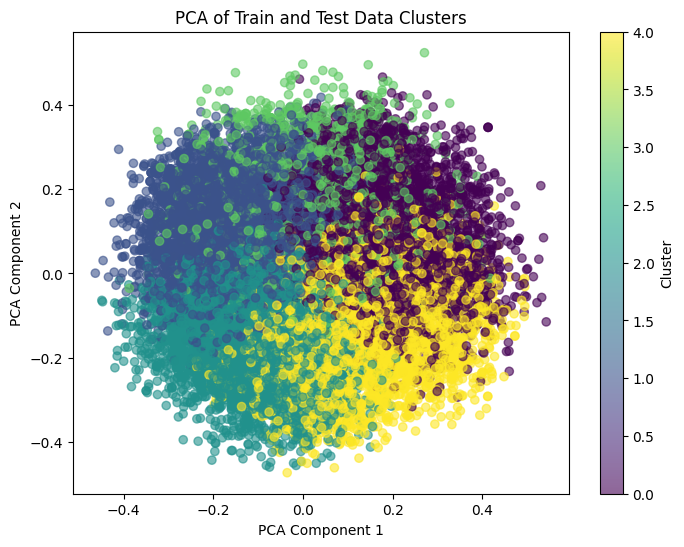

In [ ]:
# Function to clean and preprocess the text data (optional)
def preprocess_text(text):
    # Basic text preprocessing (optional)
    text = text.lower()
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    return text

# Step 1: Preprocess the train and test data
train_data['cleaned_text1'] = train_data['about'].apply(preprocess_text)
test_data['cleaned_text1'] = test_data['about'].apply(preprocess_text)
train_feature_data['cleaned_text1'] = train_feature_data['about'].apply(preprocess_text)
personality_train_data['cleaned_text1'] = personality_train_data['about'].apply(preprocess_text)
personality_test_data['cleaned_text1'] = personality_test_data['about'].apply(preprocess_text)
#personality_train_model_data['cleaned_text1'] = personality_train_model_data['about'].apply(preprocess_text)

# Step 2: Load a pre-trained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight model for embeddings

# Step 3: Generate embeddings for train and test data
train_embeddings = model.encode(train_data['cleaned_text1'].tolist(), convert_to_numpy=True)
test_embeddings = model.encode(test_data['cleaned_text1'].tolist(), convert_to_numpy=True)
train_feature_embeddings = model.encode(train_feature_data['cleaned_text1'].tolist(), convert_to_numpy=True)
personality_train_embeddings = model.encode(personality_train_data['cleaned_text1'].tolist(), convert_to_numpy=True)
personality_test_embeddings = model.encode(personality_test_data['cleaned_text1'].tolist(), convert_to_numpy=True)
#personality_train_model_embeddings = model.encode(personality_train_model_data['cleaned_text1'].tolist(), convert_to_numpy=True)


# Step 4: Apply K-Means clustering on train data
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
train_data['about_cluster_Bert_Kmeans'] = kmeans.fit_predict(train_embeddings)

# Step 5: Predict the clusters for test data
test_data['about_cluster_Bert_Kmeans'] = kmeans.predict(test_embeddings)

# Step 6: Compute Silhouette score for test data
sil_score = silhouette_score(test_embeddings, test_data['about_cluster_Bert_Kmeans'])
print(f"Silhouette Score for Test Data: {sil_score}")

# Step 7: Output the clustered data
print("Train Data with Clusters:")
print(train_data[['cleaned_text1', 'about_cluster_Bert_Kmeans']].head())

print("Test Data with Predicted Clusters:")
print(test_data[['cleaned_text1', 'about_cluster_Bert_Kmeans']].head())

# Optionally, save the output to CSV files
train_data[['cleaned_text1', 'about_cluster_Bert_Kmeans']].to_csv('clustered_train_data.csv', index=False)
test_data[['cleaned_text1', 'about_cluster_Bert_Kmeans']].to_csv('clustered_test_data.csv', index=False)

# Step 8: PCA Visualization of the clusters
# Combine train and test embeddings for PCA visualization
combined_embeddings = np.concatenate([train_embeddings, test_embeddings])
combined_labels = np.concatenate([train_data['about_cluster_Bert_Kmeans'], test_data['about_cluster_Bert_Kmeans']])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_embeddings)

# Create a DataFrame for plotting
combined_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
combined_df['Cluster'] = combined_labels

# Plot the PCA components with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['PCA1'], combined_df['PCA2'], c=combined_df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('PCA of Train and Test Data Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


n_clusters: 2, init: k-means++, max_iter: 100, Silhouette Score: 0.042469572275877
n_clusters: 2, init: k-means++, max_iter: 200, Silhouette Score: 0.042469572275877
n_clusters: 2, init: k-means++, max_iter: 300, Silhouette Score: 0.042469572275877
n_clusters: 2, init: random, max_iter: 100, Silhouette Score: 0.04250825569033623
n_clusters: 2, init: random, max_iter: 200, Silhouette Score: 0.04250825569033623
n_clusters: 2, init: random, max_iter: 300, Silhouette Score: 0.042524304240942
n_clusters: 3, init: k-means++, max_iter: 100, Silhouette Score: 0.024857990443706512
n_clusters: 3, init: k-means++, max_iter: 200, Silhouette Score: 0.024857990443706512
n_clusters: 3, init: k-means++, max_iter: 300, Silhouette Score: 0.024857990443706512
n_clusters: 3, init: random, max_iter: 100, Silhouette Score: 0.02522382140159607
n_clusters: 3, init: random, max_iter: 200, Silhouette Score: 0.02522382140159607
n_clusters: 3, init: random, max_iter: 300, Silhouette Score: 0.02522382140159607
n_c

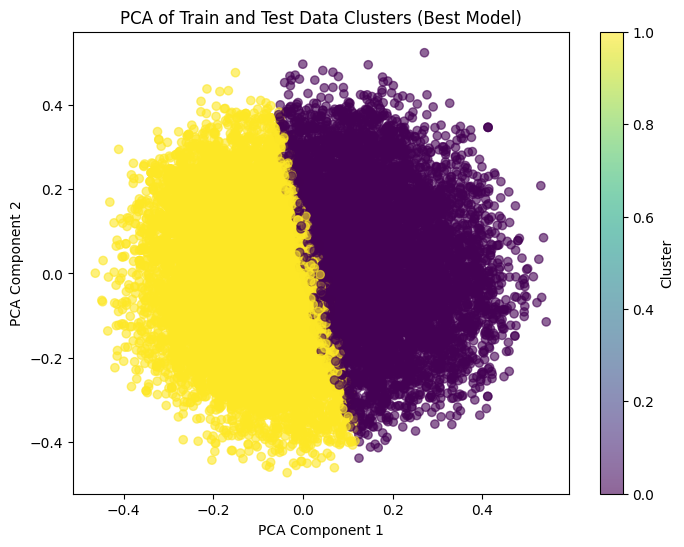

In [ ]:
C_train_embeddings, C_test_embeddings = train_test_split(train_embeddings, test_size=0.2, random_state=42)  # Adjust test size as needed

# Define the search space for hyperparameters
n_clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Range of number of clusters to try
init_methods = ['k-means++', 'random']  # Different initialization methods for centroids
max_iter_range = [100, 200, 300]  # Different number of iterations for KMeans

# Function to evaluate silhouette score for a set of hyperparameters
def evaluate_kmeans(n_clusters, init, max_iter, C_train_embeddings, C_test_embeddings):
    kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=42)
    kmeans.fit(C_train_embeddings)  # Train on the train set
    C_test_clusters = kmeans.predict(C_test_embeddings)  # Predict on the test set

    # Calculate the silhouette score
    sil_score = silhouette_score(C_test_embeddings, C_test_clusters)
    return sil_score, kmeans  # Return both score and the trained model

# Search through the hyperparameter combinations
best_score = -1
best_params = None
best_kmeans = None

for n_clusters in n_clusters_range:
    for init in init_methods:
        for max_iter in max_iter_range:
            # Evaluate for the current hyperparameters
            sil_score, kmeans = evaluate_kmeans(n_clusters, init, max_iter, C_train_embeddings, C_test_embeddings)
            print(f"n_clusters: {n_clusters}, init: {init}, max_iter: {max_iter}, Silhouette Score: {sil_score}")

            # If the current score is better than the best score, update the best parameters
            if sil_score > best_score:
                best_score = sil_score
                best_params = (n_clusters, init, max_iter)
                best_kmeans = kmeans

# Output the best hyperparameters and the corresponding silhouette score
print("\nBest Hyperparameters found:")
print(f"n_clusters: {best_params[0]}, init: {best_params[1]}, max_iter: {best_params[2]}")
print(f"Best Silhouette Score: {best_score}")

# Step 1: Assign the best cluster labels to the train and test data
train_data['about_K-means_Bert_cluster'] = best_kmeans.predict(train_embeddings)
test_data['about_K-means_Bert_cluster'] = best_kmeans.predict(test_embeddings)

print("clusters on previously unseen data, even in the hyper parameter optimization process to prevent overfitting on the test data:")
score = silhouette_score(test_embeddings, test_data['about_K-means_Bert_cluster'])
print(f"Silhouette Score for Test Clusters: {score}")
# Step 2: PCA Visualization of the clusters
# Combine train and test embeddings for PCA visualization
combined_embeddings = np.concatenate([train_embeddings, test_embeddings])
combined_labels = np.concatenate([train_data['about_K-means_Bert_cluster'], test_data['about_K-means_Bert_cluster']])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_embeddings)

# Create a DataFrame for plotting
combined_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
combined_df['Cluster'] = combined_labels

# Plot the PCA components with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['PCA1'], combined_df['PCA2'], c=combined_df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('PCA of Train and Test Data Clusters (Best Model)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



BERTopic: can cluster end extract topics out of BERT embedded texts

In [ ]:
test_embeddings

array([[-0.02024228, -0.0035789 , -0.00813011, ..., -0.02764403,
         0.0169274 , -0.02908738],
       [-0.06180657,  0.02109747, -0.03020226, ..., -0.14363535,
        -0.04240183,  0.01876884],
       [-0.07808727, -0.05685222, -0.00120483, ..., -0.18194596,
         0.01112831, -0.00766929],
       ...,
       [ 0.02989989, -0.07643962, -0.05052828, ..., -0.09686842,
        -0.02847079,  0.05479461],
       [ 0.03277627,  0.03137232, -0.02922778, ..., -0.05882796,
        -0.07780571,  0.03929604],
       [-0.0484922 , -0.03477608, -0.02861281, ..., -0.1016745 ,
        -0.04252465, -0.00571656]], dtype=float32)

In [ ]:
# Step 1: Initialize BERTopic
topic_model = BERTopic(
    language="english",
    calculate_probabilities=True,  # Optional: Calculate probabilities for topic assignments
)

# Step 2: Fit the model using precomputed embeddings and corresponding text
topics, probabilities = topic_model.fit_transform(train_data['cleaned_text1'].tolist(), embeddings=train_embeddings)

# Step 3: Reduce the number of topics to a maximum of 20
# Pass the original documents (train_data['cleaned_text1'].tolist()) to reduce_topics
topic_model.reduce_topics(train_data['cleaned_text1'].tolist(), nr_topics=20)

# Step 4: Add the reduced topic labels to the training data
train_data['about_K-means_Bertopic_topic'] = topic_model.get_document_info(train_data['cleaned_text1'])['Topic']

# Step 5: Apply the model to the test data
test_topics, _ = topic_model.transform(test_data['cleaned_text1'].tolist(), embeddings=test_embeddings)
test_data['about_K-means_Bertopic_topic'] = test_topics

# Step 6: Explore the reduced topics
for topic in range(20):  # Assuming a maximum of 20 topics
    print(f"Topic {topic}: {topic_model.get_topic(topic)}")

# Step 7: Visualize the reduced topics
topic_model.visualize_topics()


Topic 0: [('and', 0.03728788284702606), ('of', 0.028315442789529525), ('in', 0.02809097872199847), ('the', 0.027828393305667852), ('to', 0.02584742378551304), ('with', 0.02101591654651072), ('for', 0.01737479753966785), ('as', 0.015589255439043513), ('my', 0.014704395926836127), ('at', 0.014563483863943412)]
Topic 1: [('and', 0.03560021187064852), ('design', 0.035322564078499055), ('in', 0.028236884368041466), ('with', 0.02807824844202383), ('to', 0.024134851010373166), ('of', 0.023336554763455128), ('my', 0.022354619658818364), ('the', 0.021836333288695494), ('for', 0.021756712065139853), ('experience', 0.02079032087383577)]
Topic 2: [('energy', 0.03705260228141113), ('and', 0.03544180495505569), ('the', 0.03447801559693513), ('food', 0.032369431439633126), ('to', 0.028964506544468017), ('in', 0.02661964669807723), ('of', 0.026606160874134834), ('for', 0.020109150250891113), ('with', 0.01988041255222151), ('is', 0.01873755242137861)]
Topic 3: [('she', 0.055147872149803316), ('her', 0.

In [ ]:
# Step 1: Define a function to generate a label for each topic
def generate_topic_label(topic_num, top_n_words=5):
    # Get the top n words of the topic
    top_words = topic_model.get_topic(topic_num)

    # If the topic doesn't exist or has no words (i.e., it returns False), return a default label
    if not top_words:  # False, None, or empty list are handled here
        return f"Topic {topic_num} (No words)"

    # Extract the words from the list of tuples
    words = [word for word, _ in top_words[:top_n_words]]

    # Create a label by joining the top words
    label = " ".join(words)

    return label

# Step 2: Generate labels for all topics
topic_labels = {}
for topic_num in range(20):  # Assuming you have 20 topics
    topic_labels[topic_num] = generate_topic_label(topic_num)

# Step 3: Add the labels to the training data
train_data['about_K-means_Bertopic_topic_label'] = train_data['about_K-means_Bertopic_topic'].map(topic_labels)

# Step 4: Add the labels to the test data
test_data['about_K-means_Bertopic_topic_label'] = test_data['about_K-means_Bertopic_topic'].map(topic_labels)

# Step 5: Print the topic labels for verification
for topic_num, label in topic_labels.items():
    print(f"Topic {topic_num}: {label}")


Topic 0: and of in the to
Topic 1: and design in with to
Topic 2: energy and the food to
Topic 3: she her the and is
Topic 4: education teaching and teacher students
Topic 5: music and the to of
Topic 6: and to with in of
Topic 7: things the to love technology
Topic 8: linkedin to me and you
Topic 9: sports and the media of
Topic 10: the and autonomous 3d vision
Topic 11: insurance legal and law the
Topic 12: supply chain management supplier and
Topic 13: cannabis lori the and hemp
Topic 14: veterinary my animal to conservation
Topic 15: materials graphene spectroscopy taday chemistry
Topic 16: fitness trainer certified training conditioning
Topic 17: car the shoppers shopper automotive
Topic 18: event events we to your
Topic 19: Topic 19 (No words)


### Topic Analysis

Topic 0: Generic Words and Stopwords
Keywords: and, of, in, the, to
Interpretation: This topic consists mainly of stopwords, which lack specific thematic focus. It might represent noise or unprocessed text within the dataset.

Topic 1: Design and Creativity
Keywords: and, design, in, with, to
Interpretation: This topic emphasizes design, creativity, and innovation. It likely includes discussions about aesthetics, functional design, or user-centric approaches.

Topic 2: Energy and Food
Keywords: energy, and, the, food, to
Interpretation: This topic focuses on energy and food systems, potentially discussing sustainability, renewable energy, or the intersection of food production and energy efficiency.

Topic 3: Gender and Personal Narratives
Keywords: she, her, the, and, is
Interpretation: This topic highlights personal narratives or discussions related to gender, particularly focusing on women and their experiences.

Topic 4: Education and Teaching
Keywords: education, teaching, and, teacher, students
Interpretation: This topic is centered on education, teaching methodologies, and student engagement. It likely reflects discussions about academic practices and the role of teachers.

Topic 5: Music and Arts
Keywords: music, and, the, to, of
Interpretation: This topic revolves around music and possibly other art forms. It may include discussions about musical genres, performance, or the cultural impact of music.

Topic 6: Generic Words and Context
Keywords: and, to, with, in, of
Interpretation: Another topic consisting of generic or filler words. It represents content without a clear theme or may indicate preprocessing issues.

Topic 7: Technology and Passion
Keywords: things, the, to, love, technology
Interpretation: This topic reflects enthusiasm for technology and innovation. Words like "love" suggest a passionate or personal connection to technological advancements.

Topic 8: LinkedIn and Networking
Keywords: linkedin, to, me, and, you
Interpretation: This topic is focused on LinkedIn and professional networking. It likely reflects discussions around career growth, connections, or personal branding.

Topic 9: Sports and Media
Keywords: sports, and, the, media, of
Interpretation: This topic highlights sports and its relationship with media, potentially discussing sports journalism, broadcasting, or the cultural impact of sports.

Topic 10: Autonomous Technology and Vision
Keywords: the, and, autonomous, 3d, vision
Interpretation: This topic focuses on autonomous technologies, 3D vision, and innovation in fields like robotics, AI, or autonomous vehicles.

Topic 11: Insurance and Legal Matters
Keywords: insurance, legal, and, law, the
Interpretation: This topic revolves around insurance and legal issues, likely covering discussions about law, regulations, or policies in the insurance sector.

Topic 12: Supply Chain Management
Keywords: supply, chain, management, supplier, and
Interpretation: This topic focuses on supply chain management and logistics, highlighting discussions about suppliers, operations, and efficiency in business processes.

Topic 13: Cannabis and Hemp
Keywords: cannabis, lori, the, and, hemp
Interpretation: This topic centers on the cannabis and hemp industries, potentially discussing business, legal, or health-related aspects of these sectors.

Topic 14: Veterinary and Conservation
Keywords: veterinary, my, animal, to, conservation
Interpretation: This topic reflects discussions about veterinary science and animal conservation, focusing on care, research, or sustainability in animal welfare.

Topic 15: Materials and Chemistry
Keywords: materials, graphene, spectroscopy, taday, chemistry
Interpretation: This topic focuses on advanced materials and chemistry, particularly innovations like graphene and spectroscopy techniques.

Topic 16: Fitness and Training
Keywords: fitness, trainer, certified, training, conditioning
Interpretation: This topic revolves around fitness, personal training, and physical conditioning, likely highlighting certifications and expertise in this field.

Topic 17: Automotive and Shopping
Keywords: car, the, shoppers, shopper, automotive
Interpretation: This topic focuses on automotive industries and consumer behavior, potentially discussing car buying, trends, or shopper experiences.

Topic 18: Events and Engagement
Keywords: event, events, we, to, your
Interpretation: This topic highlights events and community engagement, likely focusing on organizing, attending, or promoting events.

Topic 19: Undefined
Keywords: (No words)
Interpretation: This topic lacks meaningful content and might indicate noise or empty data.

Summary of Themes

Professional and Industry-Specific Topics: Topics 1 (design), 12 (supply chain), 11 (insurance), and 15 (materials) focus on industry-specific areas.
Social and Cultural Themes: Topics 3 (gender), 5 (music), and 14 (veterinary) reflect cultural and societal interests.
Technology and Innovation: Topics 7 (technology passion), 10 (autonomous tech), and 15 (chemistry) emphasize advancements in technology.
Lifestyle and Personal Interests: Topics 16 (fitness), 17 (automotive), and 18 (events) highlight personal and community engagement.
General and Undefined: Topics 0 and 6 consist of generic or stopwords, indicating potential preprocessing gaps.

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


# Sentimental Analysis

Recommendation for Your Use Case (Short Texts/Tweets):
- For quick, rule-based emotion analysis, VADER is a great starting point. It is lightweight, fast, and works well for informal text like tweets.
- For more nuanced emotion classification, consider using a pretrained BERT model for emotion classification (like the j-hartmann/emotion-english-distilroberta-base model on Hugging Face).
- If you want to have more granular emotion detection (beyond just positive or negative sentiment), a pretrained BERT model like GoEmotions is your best bet for classifying tweets into multiple emotions like joy, anger, sadness, etc.


Vader works with raw text, that does not require stop word removal. VADER relies on a lexicon of pre-defined words that are associated with sentiment scores (positive, negative, neutral).
Even stop words like "the," "is," and "in" can be important for VADER's calculations because they affect the tone of the sentence and the context.
For example, the phrase "This is not good" is important in determining sentiment, and removing "is" would leave "This not good," which would change the meaning.

In [ ]:
# Import necessary libraries
# Download the VADER lexicon (required for sentiment analysis)
nltk.download('vader_lexicon')

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis on text and return sentiment as a dictionary
def get_vader_sentiment(text):
    sentiment = sia.polarity_scores(text)  # Get the sentiment scores
    return sentiment  # Return the full dictionary of sentiment scores

# Apply VADER sentiment analysis row by row for train_data and split the results into four columns
train_data[['about_vader_sentiment_neg', 'about_vader_sentiment_neu',
            'about_vader_sentiment_pos', 'about_vader_sentiment_compound']] = \
    train_data['about'].apply(lambda x: pd.Series(get_vader_sentiment(x)))

# Apply VADER sentiment analysis row by row for test_data and split the results into four columns
test_data[['about_vader_sentiment_neg', 'about_vader_sentiment_neu',
           'about_vader_sentiment_pos', 'about_vader_sentiment_compound']] = \
    test_data['about'].apply(lambda x: pd.Series(get_vader_sentiment(x)))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
train_data1 = train_data
test_data1 = test_data

In [ ]:
train_data = train_data1
test_data = test_data1

In [ ]:
train_data

Unnamed: 0                    username  \
0            6356                josh-rickard   
1            9317           farshad-kazemian-   
2           19690        kannanmuthukkaruppan   
3           21602       puja-wadhawan-02880a3   
4           14084                      kadiru   
...           ...                         ...   
11936       11964         cory-combs-2b08b868   
11937       21575                 amitsri1008   
11938        5390                adamsharkawy   
11939         860  jaqqui-posthumus-3ba7b2123   
11940       15795           mung-ki-woo-b9419   

                                                   about  \
0      I am a creator of things, who loves to automat...   
1      .................. WHAT IF EATING MEAT COULD H...   
2      I have primarily worked on databases, large sc...   
3      Dynamic, resourceful and ethical Executive Ass...   
4      As of Sep 2024, slowly coming out of a long te...   
...                                                  ...   
11936           Building the future of electric aviation   
11937  Engineer at heart who has managed teams and ta...   
11938  Adam is founding and managing partner of Mater...   
11939  Country Head and Executive Director of Digitai...   
11940  Scaling digital innovative services is my pass...   

       Success_after_5_years equity_rounds_raised_after_5_years  \
0                          0                                  0   
1                          0                                  1   
2                          0                                  2   
3                          0                                  1   
4                          0                                  2   
...                      ...                                ...   
11936                      0                                  0   
11937                      0                                  1   
11938                      0                                  3   
11939                      0                                  0   
11940                     -1                                  —   

       Success_until_now                                       cleaned_text  \
0                      0  creator things loves automate everything using...   
1                      0  eating meat could positive impact environment ...   
2                      0  primarily worked databases large scale storage...   
3                      0  dynamic resourceful ethical executive assistan...   
4                     -1             sep slowly coming long term sabbatical   
...                  ...                                                ...   
11936                  0                  building future electric aviation   
11937                  1  engineer heart managed teams taken semiconduct...   
11938                  0  adam founding managing partner material impact...   
11939                  0  country head executive director digitail south...   
11940                 -1  scaling digital innovative services passion lo...   

       about_cluster_Kmeans_initial_model  \
0                                       2   
1                                       4   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
11936                                   0   
11937                                   2   
11938                                   3   
11939                                   1   
11940                                   1   

       about_grid_optimized_k-means_cluster  \
0                                        17   
1                                         6   
2                                         1   
3                                        11   
4                                         1   
...                                     ...   
11936                                     1   
11937                     

Here’s a step-by-step approach for implementing a **BERT** model using Hugging Face's transformers library for emotion classification

In [ ]:
# Load the Emotion Dataset from Hugging Face
dataset = load_dataset('emotion')

# Check the structure of the dataset
print(dataset)


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function to tokenize the input data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Tokenize the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# Split dataset into train and test sets
train_data2, test_data2 = tokenized_datasets["train"], tokenized_datasets["test"]

# Convert datasets to PyTorch format (optional but necessary for trainer)
train_data2 = train_data2.with_format("torch", columns=['input_ids', 'attention_mask', 'label'])
test_data2 = test_data2.with_format("torch", columns=['input_ids', 'attention_mask', 'label'])


In [ ]:
# Initialize the BERT model for emotion classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We use Hugging Face's Trainer API to simplify the training process. We also define training arguments.

In [ ]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',         # output directory
    num_train_epochs=3,             # number of training epochs
    per_device_train_batch_size=8,  # batch size for training
    per_device_eval_batch_size=8,   # batch size for evaluation
    warmup_steps=500,               # number of warmup steps for learning rate scheduler
    weight_decay=0.01,              # strength of weight decay
    logging_dir='./logs',           # directory for storing logs
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                     # the model to be trained
    args=training_args,              # training arguments
    train_dataset=train_data2,        # training dataset
    eval_dataset=test_data2           # evaluation dataset
)


Train the Model

In [ ]:
# Train the model
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=6000, training_loss=0.26555610953768094, metrics={'train_runtime': 1139.3119, 'train_samples_per_second': 42.131, 'train_steps_per_second': 5.266, 'total_flos': 1.2629784231936e+16, 'train_loss': 0.26555610953768094, 'epoch': 3.0})

Evaluate the Model

In [ ]:
# Evaluate the model on the test dataset
results = trainer.evaluate()

# Display results
print(results)


{'eval_loss': 0.21890628337860107, 'eval_runtime': 12.8338, 'eval_samples_per_second': 155.839, 'eval_steps_per_second': 19.48, 'epoch': 3.0}


The low loss of 0,207 is relatively low, indicating that the model is performing well.

In [ ]:
train_data

Unnamed: 0                    username  \
0            6356                josh-rickard   
1            9317           farshad-kazemian-   
2           19690        kannanmuthukkaruppan   
3           21602       puja-wadhawan-02880a3   
4           14084                      kadiru   
...           ...                         ...   
11936       11964         cory-combs-2b08b868   
11937       21575                 amitsri1008   
11938        5390                adamsharkawy   
11939         860  jaqqui-posthumus-3ba7b2123   
11940       15795           mung-ki-woo-b9419   

                                                   about  \
0      I am a creator of things, who loves to automat...   
1      .................. WHAT IF EATING MEAT COULD H...   
2      I have primarily worked on databases, large sc...   
3      Dynamic, resourceful and ethical Executive Ass...   
4      As of Sep 2024, slowly coming out of a long te...   
...                                                  ...   
11936           Building the future of electric aviation   
11937  Engineer at heart who has managed teams and ta...   
11938  Adam is founding and managing partner of Mater...   
11939  Country Head and Executive Director of Digitai...   
11940  Scaling digital innovative services is my pass...   

       Success_after_5_years equity_rounds_raised_after_5_years  \
0                          0                                  0   
1                          0                                  1   
2                          0                                  2   
3                          0                                  1   
4                          0                                  2   
...                      ...                                ...   
11936                      0                                  0   
11937                      0                                  1   
11938                      0                                  3   
11939                      0                                  0   
11940                     -1                                  —   

       Success_until_now                                       cleaned_text  \
0                      0  creator things loves automate everything using...   
1                      0  eating meat could positive impact environment ...   
2                      0  primarily worked databases large scale storage...   
3                      0  dynamic resourceful ethical executive assistan...   
4                     -1             sep slowly coming long term sabbatical   
...                  ...                                                ...   
11936                  0                  building future electric aviation   
11937                  1  engineer heart managed teams taken semiconduct...   
11938                  0  adam founding managing partner material impact...   
11939                  0  country head executive director digitail south...   
11940                 -1  scaling digital innovative services passion lo...   

       about_cluster_Kmeans_initial_model  \
0                                       2   
1                                       4   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
11936                                   0   
11937                                   2   
11938                                   3   
11939                                   1   
11940                                   1   

       about_grid_optimized_k-means_cluster  \
0                                        17   
1                                         6   
2                                         1   
3                                        11   
4                                         1   
...                                     ...   
11936                                     1   
11937                     

In [ ]:
# Ensure the model is moved to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define a function to predict emotions for a given text
def predict_emotion(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Move the inputs to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # Get the predicted class
        predicted_class = torch.argmax(logits, dim=-1).item()
    return predicted_class

# Apply emotion prediction on train_data and test_data
train_data['about_bert_emotion_prediction'] = train_data['about'].apply(lambda x: predict_emotion(x))
test_data['about_bert_emotion_prediction'] = test_data['about'].apply(lambda x: predict_emotion(x))

# Optional: Display the first few rows of train_data and test_data to verify the new column
print(train_data[['about', 'about_bert_emotion_prediction']].head())
print(test_data[['about', 'about_bert_emotion_prediction']].head())


                                               about  \
0  I am a creator of things, who loves to automat...   
1  .................. WHAT IF EATING MEAT COULD H...   
2  I have primarily worked on databases, large sc...   
3  Dynamic, resourceful and ethical Executive Ass...   
4  As of Sep 2024, slowly coming out of a long te...   

   about_bert_emotion_prediction  
0                              1  
1                              1  
2                              1  
3                              1  
4                              4  
                                               about  \
0  Joseph has 18 years of experience working on t...   
1  I am currently working as an Independent Secur...   
2  With over 9 years of experience in fintech, bl...   
3  I build world class technology that improves h...   
4  Melissa James BA LLB (Hons) GAICD is a Partner...   

   about_bert_emotion_prediction  
0                              0  
1                              4  
2          

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'username', 'about', 'Success_after_5_years',
       'equity_rounds_raised_after_5_years', 'Success_until_now',
       'cleaned_text', 'about_cluster_Kmeans_initial_model',
       'about_grid_optimized_k-means_cluster', 'tokens',
       'about_LDA_assigned_topic', 'cleaned_text1',
       'about_cluster_Bert_Kmeans', 'about_K-means_Bert_cluster',
       'about_K-means_Bertopic_topic', 'about_K-means_Bertopic_topic_label',
       'about_vader_sentiment_neg', 'about_vader_sentiment_neu',
       'about_vader_sentiment_pos', 'about_vader_sentiment_compound',
       'about_bert_emotion_prediction'],
      dtype='object')

In [ ]:
test_data

Unnamed: 0                   username  \
0          17116  joseph-chen-cmrp-691bb510   
1          21025               dylan-lawhon   
2           3115                   victor-i   
3          14919               davidstavens   
4          15700       melissajamesmorrison   
...          ...                        ...   
5099        6056                traciebrack   
5100        2928      adam-norris-09528b149   
5101       14359                 ryandenehy   
5102       11286   vasil-karpitski-29142619   
5103       19323          nicholasshevelyov   

                                                  about  \
0     Joseph has 18 years of experience working on t...   
1     I am currently working as an Independent Secur...   
2     With over 9 years of experience in fintech, bl...   
3     I build world class technology that improves h...   
4     Melissa James BA LLB (Hons) GAICD is a Partner...   
...                                                 ...   
5099  I have the privilege of working with global in...   
5100  Building the worlds best electric scooter bran...   
5101  3x entrepreneur with two exits to public compa...   
5102  - Business Development Management and Sales ma...   
5103  vCSO.ai provides cyber security executive advi...   

      Success_after_5_years equity_rounds_raised_after_5_years  \
0                         0                                  0   
1                         0                                  2   
2                         0                                  0   
3                         1                                  3   
4                        -1                                  —   
...                     ...                                ...   
5099                      0                                  1   
5100                      0                                  1   
5101                      1                                  2   
5102                      0                                  1   
5103                      0                                  1   

      Success_until_now                                       cleaned_text  \
0                     0  joseph years experience working client side ag...   
1                     0  currently working independent security researc...   
2                     0  years experience fintech blockchain cloud doma...   
3                     1  build world class technology improves human li...   
4                    -1  melissa james ba llb hons gaicd partner touris...   
...                 ...                                                ...   
5099                  0  privilege working global industry leaders tran...   
5100                  0  building worlds best electric scooter brand of...   
5101                  1  entrepreneur two exits public companies invest...   
5102                  0  business development management sales manageme...   
5103                  1  provides cyber security executive advisory ser...   

      about_cluster_Kmeans_initial_model  \
0                                      0   
1                                      2   
2                                      3   
3                                      3   
4                                      1   
...                                  ...   
5099                                   0   
5100                                   0   
5101                                   1   
5102                                   1   
5103                                   2   

      about_grid_optimized_k-means_cluster  \
0                                        1   
1                                       17   
2                                       13   
3                                       13   
4                                       12   
...                                    ...   
5099                                    11   
5100                                     1   
5101                                     4   
5102         

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


# Supervised Machine Learning with Success as Target Variable

### TF-IDF Vectorization

In [ ]:
# Helper function to compute macro-averaged accuracy
def macro_average_accuracy(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    per_class_accuracies = [report[str(label)]['recall'] for label in np.unique(y_true)]
    return np.mean(per_class_accuracies)

train_data = train_data[train_data['cleaned_text'].notna()]
# Align train_data with X_1train
train_data = train_data.reset_index(drop=True)  # Reset index to ensure alignment
# Step 1: Resampling Data to Handle Imbalance
X_1train = vectorizer.transform(train_data['cleaned_text'])  # TF-IDF vectors for training
X_test = vectorizer.transform(test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing
y_1train = train_data["Success_after_5_years"]
y_test = test_data["Success_after_5_years"]
X_train = vectorizer.transform(train_feature_data['cleaned_text'].dropna())  # TF-IDF vectors for training
y_train = train_feature_data["Success_after_5_years"]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize probability columns for train and test data
for model_name in ['log_reg', 'random_forest', 'xgboost', 'neural_network']:
    for label in ['success_TF-IDF_about', 'neutral_TF-IDF_about', 'failure_TF-IDF_about']:
        train_data[f'{model_name}_{label}'] = 0.0
        test_data[f'{model_name}_{label}'] = 0.0

# Step 2: Logistic Regression
print("\n=== Logistic Regression ===")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

# Add probabilities to train and test data
log_reg_probs_train = log_reg.predict_proba(X_1train)
log_reg_probs_test = log_reg.predict_proba(X_test)
train_data[['log_reg_success_TF-IDF_about', 'log_reg_neutral_TF-IDF_about', 'log_reg_failure_TF-IDF_about']] = log_reg_probs_train
test_data[['log_reg_success_TF-IDF_about', 'log_reg_neutral_TF-IDF_about', 'log_reg_failure_TF-IDF_about']] = log_reg_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Step 3: Random Forest Classifier
print("\n=== Random Forest ===")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_resampled, y_resampled)
y_pred_rf = rf_clf.predict(X_test)

# Add probabilities to train and test data
rf_probs_train = rf_clf.predict_proba(X_1train)
rf_probs_test = rf_clf.predict_proba(X_test)
train_data[['random_forest_success_TF-IDF_about', 'random_forest_neutral_TF-IDF_about', 'random_forest_failure_TF-IDF_about']] = rf_probs_train
test_data[['random_forest_success_TF-IDF_about', 'random_forest_neutral_TF-IDF_about', 'random_forest_failure_TF-IDF_about']] = rf_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 4: Gradient Boosting (XGBoost) with Scale Pos Weight
# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
y_resampled_mapped = y_resampled.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

print("\n=== Gradient Boosting (XGBoost) ===")
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]  # Adjust ratio for binary imbalance
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_resampled, y_resampled_mapped)  # Use mapped labels for training

# Predict probabilities
xgb_probs_train = xgb_clf.predict_proba(X_1train)
xgb_probs_test = xgb_clf.predict_proba(X_test)

# Add probabilities to train and test data
train_data[['xgboost_success_TF-IDF_about', 'xgboost_neutral_TF-IDF_about', 'xgboost_failure_TF-IDF_about']] = xgb_probs_train
test_data[['xgboost_success_TF-IDF_about', 'xgboost_neutral_TF-IDF_about', 'xgboost_failure_TF-IDF_about']] = xgb_probs_test

# Convert predictions back to the original label space for evaluation
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map({0: -1, 1: 0, 2: 1})

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))


# Step 5: Neural Network Classifier
print("\n=== Neural Network ===")
class_weights = {0: 1.0, 1: len(y_train) / (2.0 * sum(y_train == 1))}
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Multiclass classification
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Neural Network with Class Weights
y_train_nn = np.eye(3)[y_train + 1]  # Convert to one-hot encoding for neural network
nn_model.fit(X_train, y_train_nn, epochs=20, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights)

# Evaluate Neural Network
nn_probs_train = nn_model.predict(X_1train)
nn_probs_test = nn_model.predict(X_test)
train_data[['neural_network_success_TF-IDF_about', 'neural_network_neutral_TF-IDF_about', 'neural_network_failure_TF-IDF_about']] = nn_probs_train
test_data[['neural_network_success_TF-IDF_about', 'neural_network_neutral_TF-IDF_about', 'neural_network_failure_TF-IDF_about']] = nn_probs_test

print("Neural Network probabilities added to train and test data.")
# Convert probabilities to predicted classes
y_pred_nn = np.argmax(nn_probs_test, axis=1)  # Predicted classes in [0, 1, 2]
y_pred_nn_original = pd.Series(y_pred_nn).map({0: -1, 1: 0, 2: 1})  # Map back to original labels

# Print Metrics for Neural Network
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Logistic Regression ===
Accuracy: 0.6407533560408736
Macro-Averaged Accuracy: 0.3961523323166049
              precision    recall  f1-score   support

          -1       0.10      0.28      0.14       342
           0       0.91      0.69      0.78      4431
           1       0.08      0.22      0.11       218

    accuracy                           0.64      4991
   macro avg       0.36      0.40      0.35      4991
weighted avg       0.81      0.64      0.71      4991


=== Random Forest ===
Accuracy: 0.8821879382889201
Macro-Averaged Accuracy: 0.3377323356315578
              precision    recall  f1-score   support

          -1       0.14      0.01      0.02       342
           0       0.89      0.99      0.94      4431
           1       0.17      0.01      0.02       218

    accuracy                           0.88      4991
   macro avg       0.40      0.34      0.33      4991
weighted avg       0.81      0.88      0.83      4991


=== Gradient Boosting (XGBoost) ===
Acc

In [ ]:
train_feature_data["Success_after_5_years"].unique()

array([ 0, -1,  1])

In [ ]:
train_data

Unnamed: 0                    username  \
0            6356                josh-rickard   
1            9317           farshad-kazemian-   
2           19690        kannanmuthukkaruppan   
3           21602       puja-wadhawan-02880a3   
4           14084                      kadiru   
...           ...                         ...   
11729       11964         cory-combs-2b08b868   
11730       21575                 amitsri1008   
11731        5390                adamsharkawy   
11732         860  jaqqui-posthumus-3ba7b2123   
11733       15795           mung-ki-woo-b9419   

                                                   about  \
0      I am a creator of things, who loves to automat...   
1      .................. WHAT IF EATING MEAT COULD H...   
2      I have primarily worked on databases, large sc...   
3      Dynamic, resourceful and ethical Executive Ass...   
4      As of Sep 2024, slowly coming out of a long te...   
...                                                  ...   
11729           Building the future of electric aviation   
11730  Engineer at heart who has managed teams and ta...   
11731  Adam is founding and managing partner of Mater...   
11732  Country Head and Executive Director of Digitai...   
11733  Scaling digital innovative services is my pass...   

       Success_after_5_years equity_rounds_raised_after_5_years  \
0                          0                                  0   
1                          0                                  1   
2                          0                                  2   
3                          0                                  1   
4                          0                                  2   
...                      ...                                ...   
11729                      0                                  0   
11730                      0                                  1   
11731                      0                                  3   
11732                      0                                  0   
11733                     -1                                  —   

       Success_until_now                                       cleaned_text  \
0                      0  creator things loves automate everything using...   
1                      0  eating meat could positive impact environment ...   
2                      0  primarily worked databases large scale storage...   
3                      0  dynamic resourceful ethical executive assistan...   
4                     -1             sep slowly coming long term sabbatical   
...                  ...                                                ...   
11729                  0                  building future electric aviation   
11730                  1  engineer heart managed teams taken semiconduct...   
11731                  0  adam founding managing partner material impact...   
11732                  0  country head executive director digitail south...   
11733                 -1  scaling digital innovative services passion lo...   

       about_cluster_Kmeans_initial_model  \
0                                       2   
1                                       4   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
11729                                   0   
11730                                   2   
11731                                   3   
11732                                   1   
11733                                   1   

       about_grid_optimized_k-means_cluster  \
0                                        17   
1                                         6   
2                                         1   
3                                        11   
4                                         1   
...                                     ...   
11729                                     1   
11730                     

In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Logistic Regression
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],       # Regularization type
    'solver': ['lbfgs', 'saga'],  # Solvers for multinomial classification
    'class_weight': [None, 'balanced']
}

print("\n=== Logistic Regression Optimization ===")

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
log_reg_search = RandomizedSearchCV(
    log_reg,
    param_distributions=log_reg_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
log_reg_search.fit(X_resampled, y_resampled_mapped)
best_log_reg = log_reg_search.best_estimator_

# Print the best parameters
print("Best Parameters for Logistic Regression:", log_reg_search.best_params_)

# Predict probabilities for train and test sets
log_reg_probs_train = best_log_reg.predict_proba(X_1train)
log_reg_probs_test = best_log_reg.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_log_reg_success_TF-IDF_about', 'improved_log_reg_neutral_TF-IDF_about', 'improved_log_reg_failure_TF-IDF_about']] = log_reg_probs_train
test_data[['improved_log_reg_success_TF-IDF_about', 'improved_log_reg_neutral_TF-IDF_about', 'improved_log_reg_failure_TF-IDF_about']] = log_reg_probs_test

# Predict and evaluate performance on the test set
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_log_reg_original = pd.Series(y_pred_log_reg).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg_original))
print(classification_report(y_test, y_pred_log_reg_original))



=== Logistic Regression Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 100}
Accuracy: 0.6826287317170907
Macro-Averaged Accuracy: 0.3764403738498722
              precision    recall  f1-score   support

          -1       0.09      0.23      0.12       342
           0       0.90      0.74      0.81      4431
           1       0.08      0.16      0.11       218

    accuracy                           0.68      4991
   macro avg       0.36      0.38      0.35      4991
weighted avg       0.81      0.68      0.74      4991



In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Random Forest
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
}

print("\n=== Random Forest Optimization ===")

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
rf_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
rf_search.fit(X_resampled, y_resampled_mapped)
best_rf = rf_search.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", rf_search.best_params_)

# Predict probabilities for train and test sets
rf_probs_train = best_rf.predict_proba(X_1train)
rf_probs_test = best_rf.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_random_forest_success_TF-IDF_about', 'improved_random_forest_neutral_TF-IDF_about', 'improved_random_forest_failure_TF-IDF_about']] = rf_probs_train
test_data[['improved_random_forest_success_TF-IDF_about', 'improved_random_forest_neutral_TF-IDF_about', 'improved_random_forest_failure_TF-IDF_about']] = rf_probs_test

# Predict and evaluate performance on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_original = pd.Series(y_pred_rf).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf_original))
print(classification_report(y_test, y_pred_rf_original))



=== Random Forest Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced'}
Accuracy: 0.8799839711480665
Macro-Averaged Accuracy: 0.33635043931601455
              precision    recall  f1-score   support

          -1       0.12      0.01      0.03       342
           0       0.89      0.99      0.94      4431
           1       0.08      0.00      0.01       218

    accuracy                           0.88      4991
   macro avg       0.36      0.34      0.32      4991
weighted avg       0.80      0.88      0.83      4991



In [ ]:
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\n=== XGBoost Optimization ===")

# Use XGBClassifier with updated parameters
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
xgb_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
xgb_search.fit(X_resampled, y_resampled_mapped)
best_xgb = xgb_search.best_estimator_

# Print the best parameters
print("Best Parameters for XGBoost:", xgb_search.best_params_)

# Predict probabilities for train and test sets
xgb_probs_train = best_xgb.predict_proba(X_1train)
xgb_probs_test = best_xgb.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_xgboost_success_TF-IDF_about', 'improved_xgboost_neutral_TF-IDF_about', 'improved_xgboost_failure_TF-IDF_about']] = xgb_probs_train
test_data[['improved_xgboost_success_TF-IDF_about', 'improved_xgboost_neutral_TF-IDF_about', 'improved_xgboost_failure_TF-IDF_about']] = xgb_probs_test

# Predict and evaluate performance on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))



=== XGBoost Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Accuracy: 0.8401122019635343
Macro-Averaged Accuracy: 0.350999375718986
              precision    recall  f1-score   support

          -1       0.11      0.07      0.09       342
           0       0.89      0.94      0.91      4431
           1       0.08      0.04      0.06       218

    accuracy                           0.84      4991
   macro avg       0.36      0.35      0.35      4991
weighted avg       0.80      0.84      0.82      4991



In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
# The optimization of neural networks takes too much time, even adjustments to make it less precise would still take too long
"""from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import pandas as pd

# Custom wrapper to make Keras models compatible with sklearn
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, optimizer='adam', dropout_rate=0.3, hidden_units=64):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.hidden_units = hidden_units
        self.model = None

    def fit(self, X, y, **fit_params):
        self.model = self.build_fn(optimizer=self.optimizer,
                                   dropout_rate=self.dropout_rate,
                                   hidden_units=self.hidden_units)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"build_fn": self.build_fn,
                "optimizer": self.optimizer,
                "dropout_rate": self.dropout_rate,
                "hidden_units": self.hidden_units}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Function to create a Keras neural network model
def create_nn_model(optimizer='adam', dropout_rate=0.3, hidden_units=64):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=X_train.shape[1]),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Multiclass classification
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Map labels [-1, 0, 1] to [0, 1, 2] for Neural Network
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Convert y_train to one-hot encoding for Neural Network
y_train_nn = np.eye(3)[y_resampled_mapped]

# Define parameter grid for RandomizedSearchCV
nn_param_grid = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'hidden_units': [32, 64, 128]
}

print("\n=== Neural Network Optimization ===")

# Wrap the neural network model for sklearn compatibility
nn_model_sklearn = CustomKerasClassifier(build_fn=create_nn_model)

# Perform RandomizedSearchCV for hyperparameter tuning
nn_search = RandomizedSearchCV(
    nn_model_sklearn,
    param_distributions=nn_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
nn_search.fit(
    X_resampled,
    y_train_nn,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_split=0.2
)
best_nn = nn_search.best_estimator_

# Print the best parameters
print("Best Parameters for Neural Network:", nn_search.best_params_)

# Predict probabilities for train and test sets
nn_probs_train = best_nn.predict_proba(X_1train)
nn_probs_test = best_nn.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_neural_network_success_TF-IDF_about', 'improved_neural_network_neutral_TF-IDF_about', 'improved_neural_network_failure_TF-IDF_about']] = nn_probs_train
test_data[['improved_neural_network_success_TF-IDF_about', 'improved_neural_network_neutral_TF-IDF_about', 'improved_neural_network_failure_TF-IDF_about']] = nn_probs_test

# Predict and evaluate performance on the test set
y_pred_nn = best_nn.predict(X_test)
y_pred_nn_original = pd.Series(y_pred_nn).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))"""


'from sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import make_scorer, classification_report, accuracy_score\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\nfrom sklearn.base import BaseEstimator, ClassifierMixin\nimport numpy as np\nimport pandas as pd\n\n# Custom wrapper to make Keras models compatible with sklearn\nclass CustomKerasClassifier(BaseEstimator, ClassifierMixin):\n    def __init__(self, build_fn, optimizer=\'adam\', dropout_rate=0.3, hidden_units=64):\n        self.build_fn = build_fn\n        self.optimizer = optimizer\n        self.dropout_rate = dropout_rate\n        self.hidden_units = hidden_units\n        self.model = None\n\n    def fit(self, X, y, **fit_params):\n        self.model = self.build_fn(optimizer=self.optimizer,\n                                   dropout_rate=self.dropout_rate,\n                                   hidden_units=self.hidden_units)\n        self.model.fit(X, y

### Bert Vectorization

In [ ]:
# Helper function to compute macro-averaged accuracy
def macro_average_accuracy(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    per_class_accuracies = [report[str(label)]['recall'] for label in np.unique(y_true)]
    return np.mean(per_class_accuracies)

# Step 1: Resampling Data to Handle Imbalance
X_1train = train_embeddings  # BERT vectors for training
X_test = test_embeddings    # BERT vectors for testing
y_1train = train_data["Success_after_5_years"]
y_test = test_data["Success_after_5_years"]
X_train = train_feature_embeddings  # BERT vectors for training
y_train = train_feature_data["Success_after_5_years"]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize probability columns for train and test data
for model_name in ['log_reg', 'random_forest', 'xgboost', 'neural_network']:
    for label in ['success_BERT_about', 'neutral_BERT_about', 'failure_BERT_about']:
        train_data[f'{model_name}_{label}'] = 0.0
        test_data[f'{model_name}_{label}'] = 0.0

# Step 2: Logistic Regression
print("\n=== Logistic Regression ===")
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

# Add probabilities to train and test data
log_reg_probs_train = log_reg.predict_proba(X_1train)
log_reg_probs_test = log_reg.predict_proba(X_test)
train_data[['log_reg_success_BERT_about', 'log_reg_neutral_BERT_about', 'log_reg_failure_BERT_about']] = log_reg_probs_train
test_data[['log_reg_success_BERT_about', 'log_reg_neutral_BERT_about', 'log_reg_failure_BERT_about']] = log_reg_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Step 3: Random Forest Classifier
print("\n=== Random Forest ===")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_resampled, y_resampled)
y_pred_rf = rf_clf.predict(X_test)

# Add probabilities to train and test data
rf_probs_train = rf_clf.predict_proba(X_1train)
rf_probs_test = rf_clf.predict_proba(X_test)
train_data[['random_forest_success_BERT_about', 'random_forest_neutral_BERT_about', 'random_forest_failure_BERT_about']] = rf_probs_train
test_data[['random_forest_success_BERT_about', 'random_forest_neutral_BERT_about', 'random_forest_failure_BERT_about']] = rf_probs_test

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 4: Gradient Boosting (XGBoost) with Scale Pos Weight
# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
y_resampled_mapped = y_resampled.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

print("\n=== Gradient Boosting (XGBoost) ===")
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]  # Adjust ratio for binary imbalance
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_resampled, y_resampled_mapped)  # Use mapped labels for training

# Predict probabilities
xgb_probs_train = xgb_clf.predict_proba(X_1train)
xgb_probs_test = xgb_clf.predict_proba(X_test)

# Add probabilities to train and test data
train_data[['xgboost_success_BERT_about', 'xgboost_neutral_BERT_about', 'xgboost_failure_BERT_about']] = xgb_probs_train
test_data[['xgboost_success_BERT_about', 'xgboost_neutral_BERT_about', 'xgboost_failure_BERT_about']] = xgb_probs_test

# Convert predictions back to the original label space for evaluation
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map({0: -1, 1: 0, 2: 1})

print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))


# Step 5: Neural Network Classifier
print("\n=== Neural Network ===")
class_weights = {0: 1.0, 1: len(y_train) / (2.0 * sum(y_train == 1))}
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Multiclass classification
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Neural Network with Class Weights
y_train_nn = np.eye(3)[y_train + 1]  # Convert to one-hot encoding for neural network
nn_model.fit(X_train, y_train_nn, epochs=20, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights)

# Evaluate Neural Network
nn_probs_train = nn_model.predict(X_1train)
nn_probs_test = nn_model.predict(X_test)
train_data[['neural_network_success_BERT_about', 'neural_network_neutral_BERT_about', 'neural_network_failure_BERT_about']] = nn_probs_train
test_data[['neural_network_success_BERT_about', 'neural_network_neutral_BERT_about', 'neural_network_failure_BERT_about']] = nn_probs_test

print("Neural Network probabilities added to train and test data.")
# Convert probabilities to predicted classes
y_pred_nn = np.argmax(nn_probs_test, axis=1)  # Predicted classes in [0, 1, 2]
y_pred_nn_original = pd.Series(y_pred_nn).map({0: -1, 1: 0, 2: 1})  # Map back to original labels

# Print Metrics for Neural Network
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Logistic Regression ===
Accuracy: 0.5762372270086155
Macro-Averaged Accuracy: 0.4005131638609982
              precision    recall  f1-score   support

          -1       0.10      0.32      0.15       342
           0       0.92      0.61      0.73      4431
           1       0.07      0.27      0.10       218

    accuracy                           0.58      4991
   macro avg       0.36      0.40      0.33      4991
weighted avg       0.82      0.58      0.67      4991


=== Random Forest ===
Accuracy: 0.8795832498497295
Macro-Averaged Accuracy: 0.34159657202535504
              precision    recall  f1-score   support

          -1       0.18      0.03      0.05       342
           0       0.89      0.99      0.94      4431
           1       0.11      0.00      0.01       218

    accuracy                           0.88      4991
   macro avg       0.39      0.34      0.33      4991
weighted avg       0.81      0.88      0.84      4991


=== Gradient Boosting (XGBoost) ===
Ac

### **Probability Extraction:**

Used **predict_proba** for LogisticRegression, RandomForestClassifier, and XGBClassifier.
For the neural network, predictions are **already probabilities (softmax outputs)**.

### Logistic Regression:

Added class_weight='balanced' to handle imbalance by assigning weights inversely proportional to class frequencies.

### Random Forest:

Added class_weight='balanced' to ensure the classifier considers the minority class during splits.

### XGBoost:

Set scale_pos_weight to the ratio of negative to positive classes (count_negative / count_positive) to bias the model toward the minority class.

### Neural Network:

Added class_weight during training to balance the importance of each class.

### SMOTE:

Oversampled the minority class using SMOTE to create a balanced training set for the classifiers.

### Random Forest:
How class_weight='balanced' Works in Random Forest:
1. Class Weight Adjustment:

- For each decision tree in the forest, the model adjusts the weighting of samples based on their class.
- With class_weight='balanced', the weights are calculated as:
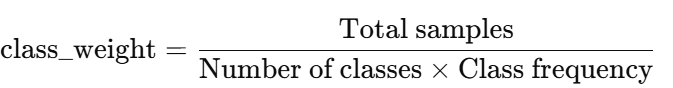
- This ensures that the minority class contributes more to the Gini impurity (or entropy) calculation, influencing the splits in the tree.

2. Impact on Node Splits:

- Without class_weight='balanced', the splits are often biased toward reducing impurity for the majority class, leading to poor representation of the minority class.
- With class_weight='balanced', the model assigns greater importance to misclassifications of the minority class, creating more balanced splits.

In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Logistic Regression
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],       # Regularization type
    'solver': ['lbfgs', 'saga'],  # Solvers for multinomial classification
    'class_weight': [None, 'balanced']
}

print("\n=== Logistic Regression Optimization ===")

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
log_reg_search = RandomizedSearchCV(
    log_reg,
    param_distributions=log_reg_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
log_reg_search.fit(X_resampled, y_resampled_mapped)
best_log_reg = log_reg_search.best_estimator_

# Print the best parameters
print("Best Parameters for Logistic Regression:", log_reg_search.best_params_)

# Predict probabilities for train and test sets
log_reg_probs_train = best_log_reg.predict_proba(X_1train)
log_reg_probs_test = best_log_reg.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_log_reg_success_BERT_about', 'improved_log_reg_neutral_BERT_about', 'improved_log_reg_failure_BERT_about']] = log_reg_probs_train
test_data[['improved_log_reg_success_BERT_about', 'improved_log_reg_neutral_BERT_about', 'improved_log_reg_failure_BERT_about']] = log_reg_probs_test

# Predict and evaluate performance on the test set
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_log_reg_original = pd.Series(y_pred_log_reg).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_log_reg_original))
print(classification_report(y_test, y_pred_log_reg_original))



=== Logistic Regression Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'class_weight': None, 'C': 100}
Accuracy: 0.5834502103786816
Macro-Averaged Accuracy: 0.3867485660298162
              precision    recall  f1-score   support

          -1       0.10      0.30      0.15       342
           0       0.91      0.62      0.74      4431
           1       0.06      0.23      0.09       218

    accuracy                           0.58      4991
   macro avg       0.35      0.39      0.33      4991
weighted avg       0.82      0.58      0.67      4991



In [ ]:
# Map labels [-1, 0, 1] to [0, 1, 2] for Random Forest
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handle class imbalance
}

print("\n=== Random Forest Optimization ===")

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
rf_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
rf_search.fit(X_resampled, y_resampled_mapped)
best_rf = rf_search.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", rf_search.best_params_)

# Predict probabilities for train and test sets
rf_probs_train = best_rf.predict_proba(X_1train)
rf_probs_test = best_rf.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_random_forest_success_BERT_about', 'improved_random_forest_neutral_BERT_about', 'improved_random_forest_failure_BERT_about']] = rf_probs_train
test_data[['improved_random_forest_success_BERT_about', 'improved_random_forest_neutral_BERT_about', 'improved_random_forest_failure_BERT_about']] = rf_probs_test

# Predict and evaluate performance on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_original = pd.Series(y_pred_rf).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_rf_original))
print(classification_report(y_test, y_pred_rf_original))



=== Random Forest Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced'}
Accuracy: 0.879783610498898
Macro-Averaged Accuracy: 0.33807407436466824
              precision    recall  f1-score   support

          -1       0.13      0.02      0.04       342
           0       0.89      0.99      0.94      4431
           1       0.11      0.00      0.01       218

    accuracy                           0.88      4991
   macro avg       0.38      0.34      0.33      4991
weighted avg       0.80      0.88      0.83      4991



In [ ]:
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Map labels [-1, 0, 1] to [0, 1, 2] for XGBoost
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\n=== XGBoost Optimization ===")

# Use XGBClassifier with updated parameters
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
xgb_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=xgb_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
xgb_search.fit(X_resampled, y_resampled_mapped)
best_xgb = xgb_search.best_estimator_

# Print the best parameters
print("Best Parameters for XGBoost:", xgb_search.best_params_)

# Predict probabilities for train and test sets
xgb_probs_train = best_xgb.predict_proba(X_1train)
xgb_probs_test = best_xgb.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_xgboost_success_BERT_about', 'improved_xgboost_neutral_BERT_about', 'improved_xgboost_failure_BERT_about']] = xgb_probs_train
test_data[['improved_xgboost_success_BERT_about', 'improved_xgboost_neutral_BERT_about', 'improved_xgboost_failure_BERT_about']] = xgb_probs_test

# Predict and evaluate performance on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_original = pd.Series(y_pred_xgb).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_xgb_original))
print(classification_report(y_test, y_pred_xgb_original))



=== XGBoost Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Accuracy: 0.848326988579443
Macro-Averaged Accuracy: 0.36349672873915345
              precision    recall  f1-score   support

          -1       0.14      0.08      0.11       342
           0       0.89      0.95      0.92      4431
           1       0.14      0.06      0.08       218

    accuracy                           0.85      4991
   macro avg       0.39      0.36      0.37      4991
weighted avg       0.81      0.85      0.83      4991



In [ ]:
# Custom wrapper to make Keras models compatible with sklearn
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, optimizer='adam', dropout_rate=0.3, hidden_units=64):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.hidden_units = hidden_units
        self.model = None

    def fit(self, X, y, **fit_params):
        self.model = self.build_fn(optimizer=self.optimizer,
                                   dropout_rate=self.dropout_rate,
                                   hidden_units=self.hidden_units)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"build_fn": self.build_fn,
                "optimizer": self.optimizer,
                "dropout_rate": self.dropout_rate,
                "hidden_units": self.hidden_units}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Function to create a Keras neural network model
def create_nn_model(optimizer='adam', dropout_rate=0.3, hidden_units=64):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=X_train.shape[1]),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Multiclass classification
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Map labels [-1, 0, 1] to [0, 1, 2] for Neural Network
label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_label_mapping = {0: -1, 1: 0, 2: 1}
y_resampled_mapped = y_resampled.map(label_mapping)  # Map resampled labels
y_test_mapped = y_test.map(label_mapping)  # Map test labels

# Convert y_train to one-hot encoding for Neural Network
y_train_nn = np.eye(3)[y_resampled_mapped]

# Define parameter grid for RandomizedSearchCV
nn_param_grid = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'hidden_units': [32, 64, 128]
}

print("\n=== Neural Network Optimization ===")

# Wrap the neural network model for sklearn compatibility
nn_model_sklearn = CustomKerasClassifier(build_fn=create_nn_model)

# Perform RandomizedSearchCV for hyperparameter tuning
nn_search = RandomizedSearchCV(
    nn_model_sklearn,
    param_distributions=nn_param_grid,
    n_iter=10,  # Number of random configurations to try
    scoring=make_scorer(macro_average_accuracy, greater_is_better=True),
    cv=3,       # Cross-validation folds
    verbose=1,
    random_state=42
)

# Fit the model using the resampled data and mapped labels
nn_search.fit(
    X_resampled,
    y_train_nn,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_split=0.2
)
best_nn = nn_search.best_estimator_

# Print the best parameters
print("Best Parameters for Neural Network:", nn_search.best_params_)

# Predict probabilities for train and test sets
nn_probs_train = best_nn.predict_proba(X_1train)
nn_probs_test = best_nn.predict_proba(X_test)

# Add probabilities to train and test datasets
train_data[['improved_neural_network_success_BERT_about', 'improved_neural_network_neutral_BERT_about', 'improved_neural_network_failure_BERT_about']] = nn_probs_train
test_data[['improved_neural_network_success_BERT_about', 'improved_neural_network_neutral_BERT_about', 'improved_neural_network_failure_BERT_about']] = nn_probs_test

# Predict and evaluate performance on the test set
y_pred_nn = best_nn.predict(X_test)
y_pred_nn_original = pd.Series(y_pred_nn).map(reverse_label_mapping)  # Reverse label mapping

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nn_original))
print("Macro-Averaged Accuracy:", macro_average_accuracy(y_test, y_pred_nn_original))
print(classification_report(y_test, y_pred_nn_original))



=== Neural Network Optimization ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5668 - loss: 0.9041 - val_accuracy: 0.5121 - val_loss: 0.7727
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6953 - loss: 0.7171 - val_accuracy: 0.8072 - val_loss: 0.5025
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8267 - loss: 0.4938 - val_accuracy: 0.9495 - val_loss: 0.2642
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8934 - loss: 0.3386 - val_accuracy: 0.9824 - val_loss: 0.1309
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9167 - loss: 0.2666 - val_accuracy: 0.9881 - val_loss: 0.0848
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.2253 - val_accuracy: 0.9948 - val_loss: 0.0653
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9413 - loss: 0.1908 - val_accuracy: 0.9990 - val_loss: 0.0327
Epoch

In [ ]:
test_data

Unnamed: 0                   username  \
0          17116  joseph-chen-cmrp-691bb510   
1          21025               dylan-lawhon   
2           3115                   victor-i   
3          14919               davidstavens   
4          15700       melissajamesmorrison   
...          ...                        ...   
5099        6056                traciebrack   
5100        2928      adam-norris-09528b149   
5101       14359                 ryandenehy   
5102       11286   vasil-karpitski-29142619   
5103       19323          nicholasshevelyov   

                                                  about  \
0     Joseph has 18 years of experience working on t...   
1     I am currently working as an Independent Secur...   
2     With over 9 years of experience in fintech, bl...   
3     I build world class technology that improves h...   
4     Melissa James BA LLB (Hons) GAICD is a Partner...   
...                                                 ...   
5099  I have the privilege of working with global in...   
5100  Building the worlds best electric scooter bran...   
5101  3x entrepreneur with two exits to public compa...   
5102  - Business Development Management and Sales ma...   
5103  vCSO.ai provides cyber security executive advi...   

      Success_after_5_years equity_rounds_raised_after_5_years  \
0                         0                                  0   
1                         0                                  2   
2                         0                                  0   
3                         1                                  3   
4                        -1                                  —   
...                     ...                                ...   
5099                      0                                  1   
5100                      0                                  1   
5101                      1                                  2   
5102                      0                                  1   
5103                      0                                  1   

      Success_until_now                                       cleaned_text  \
0                     0  joseph years experience working client side ag...   
1                     0  currently working independent security researc...   
2                     0  years experience fintech blockchain cloud doma...   
3                     1  build world class technology improves human li...   
4                    -1  melissa james ba llb hons gaicd partner touris...   
...                 ...                                                ...   
5099                  0  privilege working global industry leaders tran...   
5100                  0  building worlds best electric scooter brand of...   
5101                  1  entrepreneur two exits public companies invest...   
5102                  0  business development management sales manageme...   
5103                  1  provides cyber security executive advisory ser...   

      about_cluster_Kmeans_initial_model  \
0                                      0   
1                                      2   
2                                      3   
3                                      3   
4                                      1   
...                                  ...   
5099                                   0   
5100                                   0   
5101                                   1   
5102                                   1   
5103                                   2   

      about_grid_optimized_k-means_cluster  \
0                                        1   
1                                       17   
2                                       13   
3                                       13   
4                                       12   
...                                    ...   
5099                                    11   
5100                                     1   
5101                                     4   
5102         

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


# Personality Prediction

### TF-IDF Vectorization

# Step 1: Resampling Data to Handle Imbalance
X_1train = vectorizer.transform(train_data['cleaned_text'].dropna())  # TF-IDF vectors for training
X_1test = vectorizer.transform(test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing  
y_test = personality_test_data['agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']
X_train = vectorizer.transform(personality_train_data['cleaned_text'].dropna())  # TF-IDF vectors for training
X_test = vectorizer.transform(personality_test_data['cleaned_text'].dropna())   # TF-IDF vectors for testing

y_train = personality_train_data['agreeableness', 'openness',
       'conscientiousness', 'extraversion', 'neuroticism']

the text preprocessing and embedding is already done.
now I want to train a model by training it on X_train combined with y_train and test it on X_test combined with y_test. Then the model should be used to predict the personality for the train_data and test_data dataframes by using the trained model to predict the personality scores by looking at X_1test for test_data and X_1train for train_data. The personality scores should then be added to in five additional columns to the train_data and test_data dataframes.

Random Forest Regressor
XGBoost
Fully Connected Neural Networks

In [ ]:
# Step 1: Prepare Data

# TF-IDF vectors for train_data and test_data
X_1train = vectorizer.transform(train_data['cleaned_text'].dropna())
X_1test = vectorizer.transform(test_data['cleaned_text'].dropna())


# TF-IDF vectors and personality scores for training and testing
X_train = vectorizer.transform(personality_train_data['cleaned_text'].dropna())
X_test = vectorizer.transform(personality_test_data['cleaned_text'].dropna())

y_train = personality_train_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]
y_test = personality_test_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]

# Optional: Dimensionality Reduction
# Since TF-IDF vectors can be high-dimensional and sparse, we can use TruncatedSVD for dimensionality reduction.

svd = TruncatedSVD(n_components=100, random_state=42)  # Adjust n_components as needed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)
X_1train_reduced = svd.transform(X_1train)
X_1test_reduced = svd.transform(X_1test)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)


# Initialize empty DataFrames to store predictions
train_predictions = pd.DataFrame(index=train_data.index)
test_predictions = pd.DataFrame(index=test_data.index)

# List of personality traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")

linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_lr = linear_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Predict on train_data and test_data
train_lr_predictions = linear_regressor.predict(X_1train_scaled)
test_lr_predictions = linear_regressor.predict(X_1test_scaled)
test1_lr_predictions = linear_regressor.predict(X_test_scaled)


# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'linear_regression_{trait}_TF-IDF_about'] = train_lr_predictions[:, i]
    test_data[f'linear_regression_{trait}_TF-IDF_about'] = test_lr_predictions[:, i]
    personality_test_data[f'linear_regression_{trait}_TF-IDF_about'] = test1_lr_predictions[:, i]

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")

rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Predict on train_data and test_data
train_rf_predictions = rf_regressor.predict(X_1train_scaled)
test_rf_predictions = rf_regressor.predict(X_1test_scaled)
test1_rf_predictions = rf_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'random_forest_{trait}_TF-IDF_about'] = train_rf_predictions[:, i]
    test_data[f'random_forest_{trait}_TF-IDF_about'] = test_rf_predictions[:, i]
    personality_test_data[f'random_forest_{trait}_TF-IDF_about'] = test1_rf_predictions[:, i]

# Step 4: Gradient Boosting Regressor (XGBoost)
print("\n=== XGBoost Regressor ===")

xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
xgb_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Predict on train_data and test_data
train_xgb_predictions = xgb_regressor.predict(X_1train_scaled)
test_xgb_predictions = xgb_regressor.predict(X_1test_scaled)
test1_xgb_predictions = xgb_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'xgboost_{trait}_TF-IDF_about'] = train_xgb_predictions[:, i]
    test_data[f'xgboost_{trait}_TF-IDF_about'] = test_xgb_predictions[:, i]
    personality_test_data[f'xgboost_{trait}_TF-IDF_about'] = test1_xgb_predictions[:, i]

# Step 5: Neural Network
print("\n=== Neural Network ===")

# Define the neural network model
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5))  # Output layer for 5 personality traits
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
nn_model = create_nn_model(X_train_scaled.shape[1])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

# Evaluate on test set
y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Predict on train_data and test_data
train_nn_predictions = nn_model.predict(X_1train_scaled)
test_nn_predictions = nn_model.predict(X_1test_scaled)
test1_nn_predictions = nn_model.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'neural_network_{trait}_TF-IDF_about'] = train_nn_predictions[:, i]
    test_data[f'neural_network_{trait}_TF-IDF_about'] = test_nn_predictions[:, i]
    personality_test_data[f'neural_network_{trait}_TF-IDF_about'] = test1_nn_predictions[:, i]



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0028
Linear Regression - R^2 Score: -0.0832


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0026
Random Forest Regressor - R^2 Score: -0.0247


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0028
XGBoost Regressor - R^2 Score: -0.1077


=== Neural Network ===
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.6093 - mae: 0.6045 - val_loss: 0.0659 - val_mae: 0.2085
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2080 - mae: 0.3561 - val_loss: 0.0326 - val_mae: 0.1477
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0993 - mae: 0.2467 - val_loss: 0.0247 - val_mae: 0.1305
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0633 - mae: 0.1946 - val_loss: 0.0214 - val_mae: 0.1231
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mae: 0.1697 - val_loss: 0.0190 - val_mae: 0.1167
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━

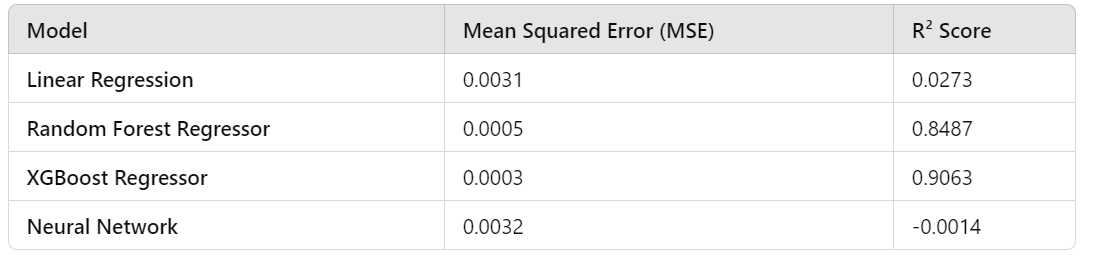


Analysis by Model

Linear Regression:

MSE: 0.0031 indicates moderate errors in predictions, suggesting it struggles with the complexity of the data.
R² Score: 0.0273 is very low, indicating that the model explains only ~2.7% of the variance in the target variable.
Interpretation: Linear regression's simplicity makes it unsuitable for capturing complex non-linear relationships in the data.

Random Forest Regressor:

MSE: 0.0005 shows significantly lower error compared to linear regression.
R² Score: 0.8487 indicates the model explains ~84.9% of the variance in the target variable.
Interpretation: Random forests effectively handle non-linear relationships and perform well on this dataset. They balance accuracy and robustness well.

XGBoost Regressor:

MSE: 0.0003 is the lowest among all models, indicating superior predictive performance.
R² Score: 0.9063 shows the highest explanatory power, capturing ~90.6% of the variance.
Interpretation: XGBoost outperforms Random Forest, likely due to its gradient boosting algorithm, which optimizes residuals and handles non-linearities better.

Neural Network:

MSE: 0.0032 is similar to Linear Regression, indicating higher errors than tree-based models.
R² Score: -0.0014 suggests the model performs worse than a simple mean prediction.
Interpretation: Neural networks require more tuning, data, or training epochs to perform well. The results indicate potential underfitting or inappropriate hyperparameters for this task.


### Bert Vectorization

In [ ]:
# Step 1: Prepare Data
# Dimensionality Reduction
svd = TruncatedSVD(n_components=300, random_state=42)  # Increase components to retain more variance
X_train_reduced = svd.fit_transform(personality_train_embeddings)
X_test_reduced = svd.transform(personality_test_embeddings)

X_1train_reduced = svd.transform(train_embeddings)
X_1test_reduced = svd.transform(test_embeddings)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)

# List of traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")
linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)
y_pred_lr = linear_regressor.predict(X_test_scaled)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")
rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))  # Increased trees
rf_regressor.fit(X_train_scaled, y_train)
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Step 4: Gradient Boosting (XGBoost)
print("\n=== XGBoost Regressor ===")
xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=200, random_state=42))
xgb_regressor.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Step 5: Neural Network
print("\n=== Neural Network ===")
def create_nn_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(5)  # Output for 5 traits
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

nn_model = create_nn_model(X_train_scaled.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Step 6: Add Predictions Efficiently
all_train_preds = {
    f'{model}_{trait}_BERT_about': preds[:, i]
    for model, preds in zip(
        ['linear_regression', 'random_forest', 'xgboost', 'neural_network'],
        [linear_regressor.predict(X_1train_scaled), rf_regressor.predict(X_1train_scaled),
         xgb_regressor.predict(X_1train_scaled), nn_model.predict(X_1train_scaled)]
    )
    for i, trait in enumerate(traits)
}

all_test_preds = {
    f'{model}_{trait}_BERT_about': preds[:, i]
    for model, preds in zip(
        ['linear_regression', 'random_forest', 'xgboost', 'neural_network'],
        [linear_regressor.predict(X_1test_scaled), rf_regressor.predict(X_1test_scaled),
         xgb_regressor.predict(X_1test_scaled), nn_model.predict(X_1test_scaled)]
    )
    for i, trait in enumerate(traits)
}

train_data = pd.concat([train_data, pd.DataFrame(all_train_preds, index=train_data.index)], axis=1)
test_data = pd.concat([test_data, pd.DataFrame(all_test_preds, index=test_data.index)], axis=1)



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0047
Linear Regression - R^2 Score: -0.8532


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0027
Random Forest Regressor - R^2 Score: -0.0688


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0034
XGBoost Regressor - R^2 Score: -0.3334


=== Neural Network ===
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - loss: 0.7472 - mae: 0.6749 - val_loss: 0.1317 - val_mae: 0.2862
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2235 - mae: 0.3719 - val_loss: 0.0492 - val_mae: 0.1723
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0968 - mae: 0.2384 - val_loss: 0.0323 - val_mae: 0.1446
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mae: 0.1838 - val_loss: 0.0242 - val_mae: 0.1277
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0382 - mae: 0.1545 - val_loss: 0.0191 - val_mae: 0.1140
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━

In [ ]:
# Step 1: Prepare Data

# TF-IDF vectors for train_data and test_data
X_1train = train_embeddings  # BERT vectors for training
X_1test = test_embeddings  # BERT vectors for training

# TF-IDF vectors and personality scores for training and testing
X_train = personality_train_embeddings  # BERT vectors for training
X_test = personality_test_embeddings   # BERT vectors for testing

y_test = personality_test_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]
y_train = personality_train_data[['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']]

# Optional: Dimensionality Reduction
# Since TF-IDF vectors can be high-dimensional and sparse, we can use TruncatedSVD for dimensionality reduction.

svd = TruncatedSVD(n_components=100, random_state=42)  # Adjust n_components as needed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)
X_1train_reduced = svd.transform(X_1train)
X_1test_reduced = svd.transform(X_1test)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
X_1train_scaled = scaler.transform(X_1train_reduced)
X_1test_scaled = scaler.transform(X_1test_reduced)

# Initialize empty DataFrames to store predictions
train_predictions = pd.DataFrame(index=train_data.index)
test_predictions = pd.DataFrame(index=test_data.index)

# List of personality traits
traits = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - R^2 Score: {r2:.4f}\n")

# Step 2: Linear Regression (Baseline)
print("\n=== Linear Regression ===")

linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_lr = linear_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Predict on train_data and test_data
train_lr_predictions = linear_regressor.predict(X_1train_scaled)
test_lr_predictions = linear_regressor.predict(X_1test_scaled)
test1_lr_predictions = linear_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'linear_regression_{trait}_BERT_about'] = train_lr_predictions[:, i]
    test_data[f'linear_regression_{trait}_BERT_about'] = test_lr_predictions[:, i]
    personality_test_data[f'linear_regression_{trait}_BERT_about'] = test1_lr_predictions[:, i]

# Step 3: Random Forest Regressor
print("\n=== Random Forest Regressor ===")

rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_rf = rf_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

# Predict on train_data and test_data
train_rf_predictions = rf_regressor.predict(X_1train_scaled)
test_rf_predictions = rf_regressor.predict(X_1test_scaled)
test1_rf_predictions = rf_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'random_forest_{trait}_BERT_about'] = train_rf_predictions[:, i]
    test_data[f'random_forest_{trait}_BERT_about'] = test_rf_predictions[:, i]
    personality_test_data[f'random_forest_{trait}_BERT_about'] = test1_rf_predictions[:, i]

# Step 4: Gradient Boosting Regressor (XGBoost)
print("\n=== XGBoost Regressor ===")

xgb_regressor = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
xgb_regressor.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

# Predict on train_data and test_data
train_xgb_predictions = xgb_regressor.predict(X_1train_scaled)
test_xgb_predictions = xgb_regressor.predict(X_1test_scaled)
test1_xgb_predictions = xgb_regressor.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'xgboost_{trait}_BERT_about'] = train_xgb_predictions[:, i]
    test_data[f'xgboost_{trait}_BERT_about'] = test_xgb_predictions[:, i]
    personality_test_data[f'xgboost_{trait}_BERT_about'] = test1_xgb_predictions[:, i]

# Step 5: Neural Network
print("\n=== Neural Network ===")

# Define the neural network model
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5))  # Output layer for 5 personality traits
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
nn_model = create_nn_model(X_train_scaled.shape[1])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
             validation_data=(X_test_scaled, y_test),
             callbacks=[early_stopping], verbose=1)

# Evaluate on test set
y_pred_nn = nn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn, "Neural Network")

# Predict on train_data and test_data
train_nn_predictions = nn_model.predict(X_1train_scaled)
test_nn_predictions = nn_model.predict(X_1test_scaled)
test1_nn_predictions = nn_model.predict(X_test_scaled)

# Add predictions to DataFrames
for i, trait in enumerate(traits):
    train_data[f'neural_network_{trait}_BERT_about'] = train_nn_predictions[:, i]
    test_data[f'neural_network_{trait}_BERT_about'] = test_nn_predictions[:, i]
    personality_test_data[f'neural_network_{trait}_BERT_about'] = test1_nn_predictions[:, i]



=== Linear Regression ===
Linear Regression - Mean Squared Error: 0.0029
Linear Regression - R^2 Score: -0.1379


=== Random Forest Regressor ===
Random Forest Regressor - Mean Squared Error: 0.0027
Random Forest Regressor - R^2 Score: -0.0489


=== XGBoost Regressor ===
XGBoost Regressor - Mean Squared Error: 0.0031
XGBoost Regressor - R^2 Score: -0.2263


=== Neural Network ===
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.8470 - mae: 0.7095 - val_loss: 0.1136 - val_mae: 0.2656
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2576 - mae: 0.3916 - val_loss: 0.0484 - val_mae: 0.1760
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1310 - mae: 0.2803 - val_loss: 0.0312 - val_mae: 0.1431
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0802 - mae: 0.2226 - val_loss: 0.0240 - val_mae: 0.1268
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mae: 0.1897 - val_loss: 0.0202 - val_mae: 0.1174
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Save all variables
# Ensure the directory exists
save_path = '/content/drive/MyDrive/Master Thesis/Data_text_variables'
os.makedirs(save_path, exist_ok=True)

# Get a copy of all global variables (to avoid modification during iteration)
all_variables = globals().copy()

# Filter out non-pickleable and irrelevant variables
variables_to_save = {}
for key, value in all_variables.items():
    try:
        # Exclude non-pickleable objects and irrelevant types
        if (
            isinstance(value, (types.ModuleType, types.FunctionType, types.BuiltinFunctionType)) or
            key.startswith("__") or
            "<locals>" in str(type(value))  # Exclude local objects
        ):
            continue
        # Test if the object is pickleable
        pickle.dumps(value)
        variables_to_save[key] = value
    except (TypeError, pickle.PicklingError, AttributeError):
        # Skip non-pickleable objects
        continue

# Save all variables to a file
save_file = os.path.join(save_path, 'all_variables.pkl')
with open(save_file, 'wb') as f:
    pickle.dump(variables_to_save, f)

print(f"Variables saved successfully to {save_file}")


Variables saved successfully to /content/drive/MyDrive/Master Thesis/Data_text_variables/all_variables.pkl


In [ ]:
personality_test_data

username                                              about  \
0     shashwatsehgal  I love building new (0 to 1) Enterprise SaaS p...   
1     shashwatsehgal  I love building new (0 to 1) Enterprise SaaS p...   
2     shashwatsehgal  I love building new (0 to 1) Enterprise SaaS p...   
3     shashwatsehgal  I love building new (0 to 1) Enterprise SaaS p...   
4     shashwatsehgal  I love building new (0 to 1) Enterprise SaaS p...   
...              ...                                                ...   
1939    doktorgurson  As a seasoned entrepreneur with a passion for ...   
1940    doktorgurson  As a seasoned entrepreneur with a passion for ...   
1941    doktorgurson  As a seasoned entrepreneur with a passion for ...   
1942    doktorgurson  As a seasoned entrepreneur with a passion for ...   
1943    doktorgurson  As a seasoned entrepreneur with a passion for ...   

      agreeableness  openness  conscientiousness  extraversion  neuroticism  \
0          0.087799  0.203735           0.118408      0.192169    -0.183167   
1          0.087799  0.203735           0.118408      0.192169    -0.183167   
2          0.087799  0.203735           0.118408      0.192169    -0.183167   
3          0.087799  0.203735           0.118408      0.192169    -0.183167   
4          0.087799  0.203735           0.118408      0.192169    -0.183167   
...             ...       ...                ...           ...          ...   
1939       0.067403  0.178914          -0.062683      0.182821    -0.229126   
1940       0.067403  0.178914          -0.062683      0.182821    -0.229126   
1941       0.067403  0.178914          -0.062683      0.182821    -0.229126   
1942       0.067403  0.178914          -0.062683      0.182821    -0.229126   
1943       0.067403  0.178914          -0.062683      0.182821    -0.229126   

                                           cleaned_text  \
0     love building new enterprise saas products cat...   
1     love building new enterprise saas products cat...   
2     love building new enterprise saas products cat...   
3     love building new enterprise saas products cat...   
4     love building new enterprise saas products cat...   
...                                                 ...   
1939  seasoned entrepreneur passion technology innov...   
1940  seasoned entrepreneur passion technology innov...   
1941  seasoned entrepreneur passion technology innov...   
1942  seasoned entrepreneur passion technology innov...   
1943  seasoned entrepreneur passion technology innov...   

                                          cleaned_text1  \
0     i love building new 0 to 1 enterprise saas pro...   
1     i love building new 0 to 1 enterprise saas pro...   
2     i love building new 0 to 1 enterprise saas pro...   
3     i love building new 0 to 1 enterprise saas pro...   
4     i love building new 0 to 1 enterprise saas pro...   
...                                                 ...   
1939  as a seasoned entrepreneur with a passion for ...   
1940  as a seasoned entrepreneur with a passion for ...   
1941  as a seasoned entrepreneur with a passion for ...   
1942  as a seasoned entrepreneur with a passion for ...   
1943  as a seasoned entrepreneur with a passion for ...   

      linear_regression_agreeableness_TF-IDF_about  ...  \
0                                         0.069757  ...   
1                                         0.069757  ...   
2                                         0.069757  ...   
3                                         0.069757  ...   
4                                         0.069757  ...   
...                                            ...  ...   
1939                                      0.072821  ...   
1940                                      0.072821  ...   
1941                                      0.072821  ...   
1942                                      0.072821  ...   
1943                                      0.072821  ...   

      xgboost_agreeableness_BERT_ab

for saving

for loading back

In [ ]:
train_data

Unnamed: 0                    username  \
0            6356                josh-rickard   
1            9317           farshad-kazemian-   
2           19690        kannanmuthukkaruppan   
3           21602       puja-wadhawan-02880a3   
4           14084                      kadiru   
...           ...                         ...   
11729       11964         cory-combs-2b08b868   
11730       21575                 amitsri1008   
11731        5390                adamsharkawy   
11732         860  jaqqui-posthumus-3ba7b2123   
11733       15795           mung-ki-woo-b9419   

                                                   about  \
0      I am a creator of things, who loves to automat...   
1      .................. WHAT IF EATING MEAT COULD H...   
2      I have primarily worked on databases, large sc...   
3      Dynamic, resourceful and ethical Executive Ass...   
4      As of Sep 2024, slowly coming out of a long te...   
...                                                  ...   
11729           Building the future of electric aviation   
11730  Engineer at heart who has managed teams and ta...   
11731  Adam is founding and managing partner of Mater...   
11732  Country Head and Executive Director of Digitai...   
11733  Scaling digital innovative services is my pass...   

       Success_after_5_years equity_rounds_raised_after_5_years  \
0                          0                                  0   
1                          0                                  1   
2                          0                                  2   
3                          0                                  1   
4                          0                                  2   
...                      ...                                ...   
11729                      0                                  0   
11730                      0                                  1   
11731                      0                                  3   
11732                      0                                  0   
11733                     -1                                  —   

       Success_until_now                                       cleaned_text  \
0                      0  creator things loves automate everything using...   
1                      0  eating meat could positive impact environment ...   
2                      0  primarily worked databases large scale storage...   
3                      0  dynamic resourceful ethical executive assistan...   
4                     -1             sep slowly coming long term sabbatical   
...                  ...                                                ...   
11729                  0                  building future electric aviation   
11730                  1  engineer heart managed teams taken semiconduct...   
11731                  0  adam founding managing partner material impact...   
11732                  0  country head executive director digitail south...   
11733                 -1  scaling digital innovative services passion lo...   

       about_cluster_Kmeans_initial_model  \
0                                       2   
1                                       4   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
11729                                   0   
11730                                   2   
11731                                   3   
11732                                   1   
11733                                   1   

       about_grid_optimized_k-means_cluster  \
0                                        17   
1                                         6   
2                                         1   
3                                        11   
4                                         1   
...                                     ...   
11729                                     1   
11730                     

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/train_about_data_output.csv")
df

Unnamed: 0.1  Unnamed: 0                    username  \
0                 0        6356                josh-rickard   
1                 1        9317           farshad-kazemian-   
2                 2       19690        kannanmuthukkaruppan   
3                 3       21602       puja-wadhawan-02880a3   
4                 4       14084                      kadiru   
...             ...         ...                         ...   
11729         11729       11964         cory-combs-2b08b868   
11730         11730       21575                 amitsri1008   
11731         11731        5390                adamsharkawy   
11732         11732         860  jaqqui-posthumus-3ba7b2123   
11733         11733       15795           mung-ki-woo-b9419   

                                                   about  \
0      I am a creator of things, who loves to automat...   
1      .................. WHAT IF EATING MEAT COULD H...   
2      I have primarily worked on databases, large sc...   
3      Dynamic, resourceful and ethical Executive Ass...   
4      As of Sep 2024, slowly coming out of a long te...   
...                                                  ...   
11729           Building the future of electric aviation   
11730  Engineer at heart who has managed teams and ta...   
11731  Adam is founding and managing partner of Mater...   
11732  Country Head and Executive Director of Digitai...   
11733  Scaling digital innovative services is my pass...   

       Success_after_5_years equity_rounds_raised_after_5_years  \
0                          0                                  0   
1                          0                                  1   
2                          0                                  2   
3                          0                                  1   
4                          0                                  2   
...                      ...                                ...   
11729                      0                                  0   
11730                      0                                  1   
11731                      0                                  3   
11732                      0                                  0   
11733                     -1                                  —   

       Success_until_now                                       cleaned_text  \
0                      0  creator things loves automate everything using...   
1                      0  eating meat could positive impact environment ...   
2                      0  primarily worked databases large scale storage...   
3                      0  dynamic resourceful ethical executive assistan...   
4                     -1             sep slowly coming long term sabbatical   
...                  ...                                                ...   
11729                  0                  building future electric aviation   
11730                  1  engineer heart managed teams taken semiconduct...   
11731                  0  adam founding managing partner material impact...   
11732                  0  country head executive director digitail south...   
11733                 -1  scaling digital innovative services passion lo...   

       about_cluster_Kmeans_initial_model  \
0                                       2   
1                                       4   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
11729                                   0   
11730                                   2   
11731                                   3   
11732                                   1   
11733                                   1   

       about_grid_optimized_k-means_cluster  ...  \
0                                        17  ...   
1                                         6  ...   
2                                         1  ...   
3                         

In [ ]:
train_data.to_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/train_about_data_output.csv")
test_data.to_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/test_about_data_output.csv")
personality_test_data.to_csv("/content/drive/MyDrive/Master Thesis/Data_text_variables/Personality/Personality_test_about_data_output.csv")

In [ ]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display all columns
print(test_data.columns)


In [ ]:
columns = train_data.columns.tolist()

# Display columns in chunks of 20 (or another size you prefer)
chunk_size = 20
for i in range(0, len(columns), chunk_size):
    print(columns[i:i+chunk_size])
